In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBClassifier
np.random.seed(7)

In [2]:
from keras.layers import Bidirectional
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [4]:
import datetime
print(datetime.datetime.now())

2019-12-04 10:28:30.541849


In [5]:
from keras.callbacks import ReduceLROnPlateau
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [6]:
my_RandomForest = RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)
my_logreg = LogisticRegression(solver='lbfgs')
my_ANN = MLPClassifier(hidden_layer_sizes=(5,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=69, 
                       learning_rate_init = 0.1)

In [7]:
callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")

In [8]:
def last_hour_window(df,hour,df_5hours):
    df['SUBJECT_ID'] = df_5hours['SUBJECT_ID']
    df['ICUSTAY_ID'] = df_5hours['ICUSTAY_ID']
    df['CHARTTIME'] = df_5hours['CHARTTIME']
    df['hr_3hours_std_0'] = df_5hours['hr_3hours_std']
    df['spo2_3hours_std_0'] = df_5hours['spo2_3hours_std']
    df['map_3hours_std_0'] = df_5hours['map_3hours_std']
    df['diastolic_3hours_std_0'] = df_5hours['diastolic_3hours_std']
    df['systolic_3hours_std_0'] = df_5hours['systolic_3hours_std']
    df['resp_3hours_std_0'] = df_5hours['resp_3hours_std']
    df['hr_3hours_mean_0'] = df_5hours['hr_3hours_mean']
    df['spo2_3hours_mean_0'] = df_5hours['spo2_3hours_mean']
    df['map_3hours_mean_0'] = df_5hours['map_3hours_mean']
    df['diastolic_3hours_mean_0'] = df_5hours['diastolic_3hours_mean']
    df['systolic_3hours_mean_0'] = df_5hours['systolic_3hours_mean']
    df['resp_3hours_mean_0'] = df_5hours['resp_3hours_mean']
    df['time_0']=df_5hours['time_0']
    for x in range(hour):
        df['hr_3hours_std_'+str(x+1)] = df['hr_3hours_std_'+str(x)].shift(periods=1)
        df['spo2_3hours_std_'+str(x+1)] = df['spo2_3hours_std_'+str(x)].shift(periods=1)
        df['map_3hours_std_'+str(x+1)] = df['map_3hours_std_'+str(x)].shift(periods=1)
        df['diastolic_3hours_std_'+str(x+1)] = df['diastolic_3hours_std_'+str(x)].shift(periods=1)
        df['systolic_3hours_std_'+str(x+1)] = df['systolic_3hours_std_'+str(x)].shift(periods=1)
        df['resp_3hours_std_'+str(x+1)] = df['resp_3hours_std_'+str(x)].shift(periods=1)
        
        df['hr_3hours_mean_'+str(x+1)] = df['hr_3hours_mean_'+str(x)].shift(periods=1)
        df['spo2_3hours_mean_'+str(x+1)] = df['spo2_3hours_mean_'+str(x)].shift(periods=1)
        df['map_3hours_mean_'+str(x+1)] = df['map_3hours_mean_'+str(x)].shift(periods=1)
        df['diastolic_3hours_mean_'+str(x+1)] = df['diastolic_3hours_mean_'+str(x)].shift(periods=1)
        df['systolic_3hours_mean_'+str(x+1)] = df['systolic_3hours_mean_'+str(x)].shift(periods=1)
        df['resp_3hours_mean_'+str(x+1)] = df['resp_3hours_mean_'+str(x)].shift(periods=1)
        df['time_'+str(x+1)] = df['time_'+str(x)].shift(periods=1)
        df = df[pd.to_datetime(df['time_'+str(x)]).dt.hour==(pd.to_datetime(df['time_'+str(x+1)]).dt.hour+1)]
        df = df.dropna()
    return df

In [9]:
def last_hour(df,hour,icu_dataset):
    df['SUBJECT_ID'] = icu_dataset['SUBJECT_ID']
    df['ICUSTAY_ID'] = icu_dataset['ICUSTAY_ID']
    df['CHARTTIME'] = icu_dataset['CHARTTIME']
    df['hr_0'] = icu_dataset['heart rate']
    df['spo2_0'] = icu_dataset['spo2']
    df['map_0'] = icu_dataset['arterial bp mean']
    df['diastolic_0'] = icu_dataset['arterial bp [diastolic]']
    df['systolic_0'] = icu_dataset['arterial bp [systolic]']
    df['resp_0'] = icu_dataset['respiratory rate']
    df['time_0'] = icu_dataset['CHARTTIME']
    for x in range(hour):
        df['hr_'+str(x+1)] = df['hr_'+str(x)].shift(periods=1)
        df['spo2_'+str(x+1)] = df['spo2_'+str(x)].shift(periods=1)
        df['map_'+str(x+1)] = df['map_'+str(x)].shift(periods=1)
        df['diastolic_'+str(x+1)] = df['diastolic_'+str(x)].shift(periods=1)
        df['systolic_'+str(x+1)] = df['systolic_'+str(x)].shift(periods=1)
        df['resp_'+str(x+1)] = df['resp_'+str(x)].shift(periods=1)
        df['time_'+str(x+1)] = df['time_'+str(x)].shift(periods=1)
        df = df[pd.to_datetime(df['time_'+str(x)]).dt.hour==(pd.to_datetime(df['time_'+str(x+1)]).dt.hour+1)]
        df = df.dropna()
    return df

In [10]:
# patients_df = pd.read_csv('PATIENTS.csv')
# print(patients_df.shape)
# patients_df['GENDER'] = patients_df['GENDER'].apply(lambda x: 1 if x=="M" else 0)
# patients_df.head()

In [11]:
icu_full_data_df = pd.read_csv('Vital Sign Full Data 2.csv')
# icu_classify_df = pd.read_csv('VitalSign.csv')
print(icu_full_data_df.shape)
icu_full_data_df.head()

# np.random.seed(2)
# test_list = np.random.randint(low=0,high=32810,size=100)
# icu_classify_df = icu_full_data_df[~icu_full_data_df['SUBJECT_ID'].isin(test_list)]
icu_classify_df = icu_full_data_df

(1335048, 16)


In [30]:
icu_3 = icu_classify_df[icu_classify_df['spo2']>100]
icu_3

,SUBJECT_ID,ICUSTAY_ID,CHARTTIME,heart rate,spo2,arterial bp mean,respiratory rate,arterial bp [diastolic],arterial bp [systolic],TARGET_hr,TARGET_spo2,TARGET_map,TARGET_dbp,TARGET_sbp,TARGET_resp,TIME
112892,28187,297092.0,2109-04-10 13:00:00,101.0,101.00,76.0,31.0,60.0,107.0,99.0,99.0,70.0,57.0,96.0,21.0,2109-04-10 14:00:00
698209,13183,297445.0,2117-06-11 13:00:00,56.0,101.00,83.0,28.0,63.0,131.0,55.0,100.0,75.0,58.0,111.0,27.0,2117-06-11 14:00:00
874907,17699,211512.0,2106-10-26 19:00:00,96.0,100.25,84.0,10.0,61.0,140.0,99.0,100.0,76.0,59.0,126.0,17.0,2106-10-26 20:00:00
1068157,22596,270858.0,2133-06-02 20:00:00,83.0,102.00,104.0,77.0,77.0,124.0,92.0,96.0,101.0,64.0,126.0,19.0,2133-06-02 21:00:00


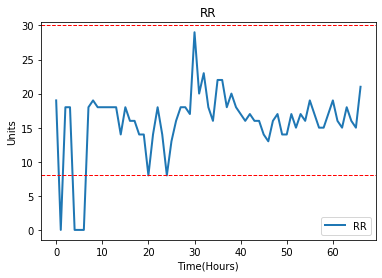

In [28]:
bins = np.linspace(0,200,40)

plt.plot(icu_3['CHARTTIME'].reset_index(drop=True).index.values, icu_3['respiratory rate'], lw=2, label='RR')
plt.xlabel('Time(Hours)')
plt.ylabel('Units')
plt.axhline(y=8, linewidth=1, color='red', ls='--')
plt.axhline(y=30, linewidth=1, color='red', ls='--')
plt.title('RR')
plt.legend(loc="lower right")
plt.show()

In [12]:
print(icu_classify_df[icu_classify_df['respiratory rate']==0].shape)
icu_classify_df = icu_classify_df[icu_classify_df['respiratory rate']!=0]
icu_classify_df = icu_classify_df[icu_classify_df['TARGET_resp']!=0]
icu_classify_df.shape

(7095, 16)


(1323410, 16)

In [13]:
icu_classify_df['TARGET_hr'] = icu_classify_df['TARGET_hr'].apply(lambda x: 1 if x>=130 else (1 if x<=50 else 0))
icu_classify_df['TARGET_spo2'] = icu_classify_df['TARGET_spo2'].apply(lambda x: 1 if x>100 else (1 if x<=90 else 0))
icu_classify_df['TARGET_map'] = icu_classify_df['TARGET_map'].apply(lambda x: 1 if x>=110 else (1 if x<=65 else 0))
icu_classify_df['TARGET_resp'] = icu_classify_df['TARGET_resp'].apply(lambda x: 1 if x>=30 else (1 if x<=8 else 0))
icu_classify_df['TARGET_sbp'] = icu_classify_df['TARGET_sbp'].apply(lambda x: 1 if x>=160 else (1 if x<=90 else 0))

print(icu_classify_df.shape)
print("TARGET_hr",icu_classify_df[icu_classify_df['TARGET_hr'] == 1].shape)
print('TARGET_spo2',icu_classify_df[icu_classify_df['TARGET_spo2'] == 1].shape)
print('TARGET_map',icu_classify_df[icu_classify_df['TARGET_map'] == 1].shape)
print('TARGET_resp',icu_classify_df[icu_classify_df['TARGET_resp'] == 1].shape)
print('TARGET_sbp',icu_classify_df[icu_classify_df['TARGET_sbp'] == 1].shape)

(1323410, 16)
TARGET_hr (22077, 16)
TARGET_spo2 (20676, 16)
TARGET_map (263408, 16)
TARGET_resp (117706, 16)
TARGET_sbp (176247, 16)


In [14]:
icu_classify_df['TARGET_spo2'] =icu_classify_df['TARGET_spo2'].apply((lambda x: 0 if x==2 else (1 if x==1 else 0)))
icu_classify_df['TARGET_spo2'].unique()

array([0, 1], dtype=int64)

In [15]:
def create_mean_std(df_5hours,hours,icu_dataset):
    df_5hours = last_hour(df_5hours,hours,icu_dataset)
    
    df_5hours['hr_3hours_mean'] = df_5hours[['hr_1','hr_2','hr_3']].mean(axis = 1)
    df_5hours['spo2_3hours_mean'] = df_5hours[['spo2_1','spo2_2','spo2_3']].mean(axis = 1) 
    df_5hours['map_3hours_mean'] = df_5hours[['map_1','map_2','map_3']].mean(axis = 1) 
    df_5hours['resp_3hours_mean'] = df_5hours[['resp_1','resp_2','resp_3']].mean(axis = 1)
    df_5hours['diastolic_3hours_mean'] = df_5hours[['diastolic_1','diastolic_2','diastolic_3']].mean(axis = 1)
    df_5hours['systolic_3hours_mean'] = df_5hours[['systolic_1','systolic_2','systolic_3']].mean(axis = 1)
    
    df_5hours['hr_3hours_std'] = df_5hours[['hr_1','hr_2','hr_3']].std(axis = 1)
    df_5hours['spo2_3hours_std'] = df_5hours[['spo2_1','spo2_2','spo2_3']].std(axis = 1) 
    df_5hours['map_3hours_std'] = df_5hours[['map_1','map_2','map_3']].std(axis = 1) 
    df_5hours['resp_3hours_std'] = df_5hours[['resp_1','resp_2','resp_3']].std(axis = 1)
    df_5hours['diastolic_3hours_std'] = df_5hours[['diastolic_1','diastolic_2','diastolic_3']].std(axis = 1)
    df_5hours['systolic_3hours_std'] = df_5hours[['systolic_1','systolic_2','systolic_3']].std(axis = 1)
    
    if hours == 5:
        df_5hours['hr_5hours_mean'] = df_5hours[['hr_1','hr_2','hr_5','hr_3','hr_4']].mean(axis = 1)
        df_5hours['spo2_5hours_mean'] = df_5hours[['spo2_1','spo2_2','spo2_5','spo2_3','spo2_4']].mean(axis = 1) 
        df_5hours['map_5hours_mean'] = df_5hours[['map_1','map_2','map_5','map_3','map_4']].mean(axis = 1) 
        df_5hours['resp_5hours_mean'] = df_5hours[['resp_1','resp_2','resp_5','resp_3','resp_4']].mean(axis = 1)
        df_5hours['diastolic_5hours_mean'] = df_5hours[['diastolic_1','diastolic_2','diastolic_5','diastolic_3','diastolic_4']].mean(axis = 1)
        df_5hours['systolic_5hours_mean'] = df_5hours[['systolic_1','systolic_2','systolic_5','systolic_3','systolic_4']].mean(axis = 1)

        df_5hours['hr_5hours_std'] = df_5hours[['hr_1','hr_2','hr_5','hr_3','hr_4']].std(axis = 1)
        df_5hours['spo2_5hours_std'] = df_5hours[['spo2_1','spo2_2','spo2_5','spo2_3','spo2_4']].std(axis = 1) 
        df_5hours['map_5hours_std'] = df_5hours[['map_1','map_2','map_5','map_3','map_4']].std(axis = 1) 
        df_5hours['resp_5hours_std'] = df_5hours[['resp_1','resp_2','resp_5','resp_3','resp_4']].std(axis = 1)
        df_5hours['diastolic_5hours_std'] = df_5hours[['diastolic_1','diastolic_2','diastolic_5','diastolic_3','diastolic_4']].std(axis = 1)
        df_5hours['systolic_5hours_std'] = df_5hours[['systolic_1','systolic_2','systolic_5','systolic_3','systolic_4']].std(axis = 1)
    
    more_features = ['SUBJECT_ID', 'ICUSTAY_ID','CHARTTIME',
                     'TARGET_hr','TARGET_spo2','TARGET_map','TARGET_resp','TARGET_sbp']
    df_5hours = pd.merge(df_5hours,icu_dataset[more_features], how='left', on=['SUBJECT_ID', 'ICUSTAY_ID','CHARTTIME'])
    # df_5hours = pd.merge(df_5hours,patients_df[['SUBJECT_ID','GENDER']], how='left', on=['SUBJECT_ID'])

    return df_5hours

In [16]:
def create_window(df_5hours_window,df_5hours,hour):
    df_5hours_window = last_hour_window(df_5hours_window,hour,df_5hours)
    hour5 = ['time_0','time_1','time_2','time_3','time_4','time_5']
    hour3 = ['time_0','time_1','time_2','time_3']
    if hour==5:
        df_5hours = df_5hours.drop(hour5, axis=1)
        df_5hours_window = df_5hours_window.drop(hour5, axis=1)
    else:
        df_5hours = df_5hours.drop(hour3, axis=1)
        df_5hours_window = df_5hours_window.drop(hour3, axis=1)
    
    df_5hours = pd.merge(df_5hours,df_5hours_window, how='inner', on=['SUBJECT_ID', 'ICUSTAY_ID','CHARTTIME'])
    
    return df_5hours

In [17]:
df_5hours = pd.DataFrame()
df_5hours = create_mean_std(df_5hours,5,icu_classify_df)

df_5hours

,SUBJECT_ID,ICUSTAY_ID,CHARTTIME,hr_0,spo2_0,map_0,diastolic_0,systolic_0,resp_0,time_0,...,spo2_5hours_std,map_5hours_std,resp_5hours_std,diastolic_5hours_std,systolic_5hours_std,TARGET_hr,TARGET_spo2,TARGET_map,TARGET_resp,TARGET_sbp
0,36,280987.0,2131-05-04 19:00:00,77.0,100.0,80.0,65.0,117.0,17.0,2131-05-04 19:00:00,...,0.000000,13.498148,3.209361,10.784248,19.034180,0,0,0,0,0
1,36,280987.0,2131-05-04 20:00:00,84.0,99.0,83.0,67.0,115.0,19.0,2131-05-04 20:00:00,...,0.000000,14.024978,2.073644,11.760102,16.009372,0,0,0,0,0
2,36,280987.0,2131-05-04 21:00:00,85.0,97.0,76.0,62.0,111.0,19.0,2131-05-04 21:00:00,...,0.447214,13.095801,2.280351,11.760102,13.255188,0,0,0,0,0
3,36,280987.0,2131-05-04 22:00:00,88.0,98.0,71.0,57.0,102.0,19.0,2131-05-04 22:00:00,...,1.303840,14.223220,2.449490,12.856905,13.453624,0,0,0,0,1
4,36,211200.0,2131-05-17 12:00:00,101.0,96.0,87.0,72.0,118.0,32.0,2131-05-17 12:00:00,...,2.190890,10.173495,0.894427,8.700575,12.541930,0,0,0,0,0
5,36,211200.0,2131-05-17 13:00:00,112.0,97.0,79.0,66.0,108.0,25.0,2131-05-17 13:00:00,...,2.190890,7.661593,5.656854,6.300794,10.014989,0,0,0,0,0
6,36,211200.0,2131-05-17 14:00:00,111.0,97.0,81.0,67.0,111.0,29.0,2131-05-17 14:00:00,...,2.049390,8.648699,5.656854,7.085196,10.709809,0,0,0,0,0
7,36,211200.0,2131-05-17 15:00:00,112.0,95.0,83.0,69.0,113.0,22.0,2131-05-17 15:00:00,...,1.643168,5.830952,5.890671,4.658326,7.981228,0,0,0,0,0
8,36,211200.0,2131-05-17 16:00:00,115.0,100.0,78.0,65.0,108.0,20.0,2131-05-17 16:00:00,...,0.836660,4.816638,4.929503,4.062019,5.263079,0,0,0,0,0
9,36,211200.0,2131-05-17 17:00:00,111.0,100.0,80.0,66.0,109.0,20.0,2131-05-17 17:00:00,...,1.870829,3.577709,4.929503,2.774887,4.159327,0,0,0,0,0


In [23]:
df_5hours_window = pd.DataFrame()
df_5hours = create_window(df_5hours_window,df_5hours,5)
df_5hours

,SUBJECT_ID,ICUSTAY_ID,CHARTTIME,hr_0,spo2_0,map_0,diastolic_0,systolic_0,resp_0,hr_1,...,map_3hours_std_5,diastolic_3hours_std_5,systolic_3hours_std_5,resp_3hours_std_5,hr_3hours_mean_5,spo2_3hours_mean_5,map_3hours_mean_5,diastolic_3hours_mean_5,systolic_3hours_mean_5,resp_3hours_mean_5
0,36,211200.0,2131-05-17 17:00:00,111.0,100.0,80.0,66.0,109.0,20.0,115.0,...,10.692677,8.621678,14.011900,1.154701,89.000000,98.666667,88.666667,74.333333,116.666667,19.333333
1,36,211200.0,2131-05-17 18:00:00,112.0,100.0,75.0,63.0,102.0,20.0,111.0,...,7.211103,5.567764,10.785793,7.571878,92.333333,97.333333,85.000000,71.000000,113.333333,23.333333
2,36,211200.0,2131-05-17 19:00:00,108.0,100.0,81.0,66.0,112.0,20.0,112.0,...,6.110101,5.033223,6.806859,6.027714,101.000000,96.333333,85.666667,71.333333,115.666667,25.666667
3,36,211200.0,2131-05-17 20:00:00,113.0,100.0,77.0,65.0,105.0,20.0,108.0,...,4.163332,3.214550,5.131601,3.511885,108.000000,96.666667,82.333333,68.333333,112.333333,28.666667
4,36,211200.0,2131-05-17 21:00:00,113.0,100.0,75.0,63.0,102.0,20.0,113.0,...,2.000000,1.527525,2.516611,3.511885,111.666667,96.333333,81.000000,67.333333,110.666667,25.333333
5,36,211200.0,2131-05-17 22:00:00,112.0,100.0,76.0,64.0,104.0,20.0,113.0,...,2.516611,2.000000,2.516611,4.725816,112.666667,97.333333,80.666667,67.000000,110.666667,23.666667
6,36,211200.0,2131-05-19 20:00:00,95.0,98.0,85.0,66.0,127.0,30.0,91.0,...,3.605551,2.645751,6.244998,0.000000,90.333333,96.000000,79.000000,65.000000,112.000000,30.000000
7,36,211200.0,2131-05-19 21:00:00,94.0,97.0,81.0,64.0,119.0,30.0,95.0,...,2.645751,2.000000,6.244998,0.000000,91.666667,96.000000,77.000000,64.000000,107.000000,30.000000
8,36,211200.0,2131-05-19 22:00:00,92.0,98.0,82.0,65.0,121.0,30.0,94.0,...,2.645751,2.516611,2.516611,0.000000,93.333333,97.000000,74.000000,61.666667,102.333333,30.000000
9,36,211200.0,2131-05-20 14:00:00,88.0,95.0,66.0,55.0,93.0,31.0,82.0,...,5.000000,4.509250,4.041452,0.000000,92.666667,96.666667,83.000000,67.333333,116.333333,28.000000


In [17]:
def df_3D_5(df):
    arr = np.dstack((df['hr_8'],df['hr_7'],df['hr_6'],df['hr_5'],df['hr_4'],df['hr_3'],df['hr_2'],df['hr_1'],df['hr_0'],
                     df['spo2_8'],df['spo2_7'],df['spo2_6'],df['spo2_5'],df['spo2_4'],df['spo2_3'],df['spo2_2'],df['spo2_1'],df['spo2_0'],
                     df['map_8'],df['map_7'],df['map_6'],df['map_5'],df['map_4'],df['map_3'],df['map_2'],df['map_1'],df['map_0'],
                     df['resp_8'],df['resp_7'],df['resp_6'],df['resp_5'],df['resp_4'],df['resp_3'],df['resp_2'],df['resp_1'],df['resp_0']))
    X = arr.reshape(df.shape[0],4,9)
    return X

In [13]:
feature_cols = ['hr_0','hr_1','hr_2','hr_3','hr_4','hr_5', 'hr_6','hr_7','hr_8',
                'spo2_0','spo2_1','spo2_2','spo2_3','spo2_4','spo2_5','spo2_6','spo2_7','spo2_8',
                'map_0','map_1','map_2','map_3','map_4','map_5','map_6','map_7','map_8',
                'resp_0','resp_1','resp_2','resp_3','resp_4','resp_5','resp_6','resp_7','resp_8']

In [66]:
def df_3D_5(df):
    arr = np.dstack((df['hr_3'],df['hr_2'],df['hr_1'],df['hr_0'],
                     df['spo2_3'],df['spo2_2'],df['spo2_1'],df['spo2_0'],
                     df['map_3'],df['map_2'],df['map_1'],df['map_0'],
                     df['resp_3'],df['resp_2'],df['resp_1'],df['resp_0']))
    X = arr.reshape(df.shape[0],4,4)
    return X

In [115]:
def df_3D_5(df):
    arr = np.dstack((df['hr_3'],df['spo2_3'],df['map_3'],df['diastolic_3'],df['systolic_3'],df['resp_3'],
                     df['hr_2'],df['spo2_2'],df['map_2'],df['diastolic_2'],df['systolic_2'],df['resp_2'],
                     df['hr_1'],df['spo2_1'],df['map_1'],df['diastolic_1'],df['systolic_1'],df['resp_1'],
                     df['hr_0'],df['spo2_0'],df['map_0'],df['diastolic_0'],df['systolic_0'],df['resp_0']))
    X = arr.reshape(df.shape[0],4,6)
    return X

In [116]:
feature_cols = ['hr_0','hr_1','hr_2','hr_3',
                'spo2_0','spo2_1','spo2_2','spo2_3',
                'map_0','map_1','map_2','map_3',
                'resp_0','resp_1','resp_2','resp_3',
                'diastolic_0','diastolic_1','diastolic_2','diastolic_3',
                'systolic_0','systolic_1','systolic_2','systolic_3'
               ]

In [63]:
def df_3D_5(df):
    arr = np.dstack((df['hr_5'],df['hr_4'],df['hr_3'],df['hr_2'],df['hr_1'],df['hr_0'],
                     df['spo2_5'],df['spo2_4'],df['spo2_3'],df['spo2_2'],df['spo2_1'],df['spo2_0'],
                     df['map_5'],df['map_4'],df['map_3'],df['map_2'],df['map_1'],df['map_0'],
                     df['diastolic_5'],df['diastolic_4'],df['diastolic_3'],df['diastolic_2'],df['diastolic_1'],df['diastolic_0'],
                     df['systolic_5'],df['systolic_4'],df['systolic_3'],df['systolic_2'],df['systolic_1'],df['systolic_0'],
                     df['resp_5'],df['resp_4'],df['resp_3'],df['resp_2'],df['resp_1'],df['resp_0']))
    X = arr.reshape(df.shape[0],6,6)
    return X

In [262]:
def df_3D_5(df):
    arr = np.dstack((df['hr_5'],df['spo2_5'],df['map_5'],df['diastolic_5'],df['systolic_5'],df['resp_5'],
                     df['hr_4'],df['spo2_4'],df['map_4'],df['diastolic_4'],df['systolic_4'],df['resp_4'],
                     df['hr_3'],df['spo2_3'],df['map_3'],df['diastolic_3'],df['systolic_3'],df['resp_3'],
                     df['hr_2'],df['spo2_2'],df['map_2'],df['diastolic_2'],df['systolic_2'],df['resp_2'],
                     df['hr_1'],df['spo2_1'],df['map_1'],df['diastolic_1'],df['systolic_1'],df['resp_1'],
                     df['hr_0'],df['spo2_0'],df['map_0'],df['diastolic_0'],df['systolic_0'],df['resp_0']))
    X = arr.reshape(df.shape[0],6,6)
    return X

In [31]:
feature_cols = ['hr_0','hr_1','hr_2','hr_3','hr_4','hr_5', 
                'spo2_0','spo2_1','spo2_2','spo2_3','spo2_4','spo2_5',
                'map_0','map_1','map_2','map_3','map_4','map_5',
                'diastolic_0','diastolic_1','diastolic_2','diastolic_3','diastolic_4','diastolic_5',
                'systolic_0','systolic_1','systolic_2','systolic_3','systolic_4','systolic_5',
                'resp_0','resp_1','resp_2','resp_3','resp_4','resp_5']

In [21]:
def df_3D_5(df):
    arr = np.dstack((df['hr_5'],df['spo2_5'],df['map_5'],df['diastolic_5'],df['systolic_5'],df['resp_5'],
                     df['hr_4'],df['spo2_4'],df['map_4'],df['diastolic_4'],df['systolic_4'],df['resp_4'],
                     df['hr_3'],df['spo2_3'],df['map_3'],df['diastolic_3'],df['systolic_3'],df['resp_3'],
                     df['hr_2'],df['spo2_2'],df['map_2'],df['diastolic_2'],df['systolic_2'],df['resp_2'],
                     df['hr_1'],df['spo2_1'],df['map_1'],df['diastolic_1'],df['systolic_1'],df['resp_1'],
                     df['hr_0'],df['spo2_0'],df['map_0'],df['diastolic_0'],df['systolic_0'],df['resp_0']))
    X = arr.reshape(df.shape[0],6,6)
    return X

In [135]:
def df_3D_5(df):
    arr = np.dstack((df['hr_3hours_mean'],df['hr_3hours_std'],df['spo2_3hours_mean'],df['spo2_3hours_std'],df['diastolic_3hours_std'],df['systolic_3hours_std'],
                     df['map_3hours_mean'],df['map_3hours_std'],df['resp_3hours_mean'],df['resp_3hours_std'],df['diastolic_3hours_std'],df['systolic_3hours_std'],
                     df['hr_3'],df['spo2_3'],df['map_3'],df['diastolic_3'],df['systolic_3'],df['resp_3'],
                     df['hr_3hours_mean'],df['hr_3hours_std'],df['spo2_3hours_mean'],df['spo2_3hours_std'],df['diastolic_3hours_std'],df['systolic_3hours_std'],
                     df['map_3hours_mean'],df['map_3hours_std'],df['resp_3hours_mean'],df['resp_3hours_std'],df['diastolic_3hours_std'],df['systolic_3hours_std'],
                     df['hr_2'],df['spo2_2'],df['map_2'],df['diastolic_2'],df['systolic_2'],df['resp_2'],
                     df['hr_3hours_mean'],df['hr_3hours_std'],df['spo2_3hours_mean'],df['spo2_3hours_std'],df['diastolic_3hours_std'],df['systolic_3hours_std'],
                     df['map_3hours_mean'],df['map_3hours_std'],df['resp_3hours_mean'],df['resp_3hours_std'],df['diastolic_3hours_std'],df['systolic_3hours_std'],
                     df['hr_1'],df['spo2_1'],df['map_1'],df['diastolic_1'],df['systolic_1'],df['resp_1'],
                     df['hr_3hours_mean'],df['hr_3hours_std'],df['spo2_3hours_mean'],df['spo2_3hours_std'],df['diastolic_3hours_std'],df['systolic_3hours_std'],
                     df['map_3hours_mean'],df['map_3hours_std'],df['resp_3hours_mean'],df['resp_3hours_std'],df['diastolic_3hours_std'],df['systolic_3hours_std'],
                     df['hr_0'],df['spo2_0'],df['map_0'],df['diastolic_0'],df['systolic_0'],df['resp_0']))
    X = arr.reshape(df.shape[0],4,18)
    return X

In [141]:
feature_cols = ['hr_0','hr_1','hr_2','hr_3',
                'spo2_0','spo2_1','spo2_2','spo2_3',
                'map_0','map_1','map_2','map_3',
                'diastolic_0','diastolic_1','diastolic_2','diastolic_3',
                'systolic_0','systolic_1','systolic_2','systolic_3',
                'resp_0','resp_1','resp_2','resp_3',
                'hr_3hours_mean','spo2_3hours_mean','map_3hours_mean','resp_3hours_mean','diastolic_3hours_mean','systolic_3hours_mean',
                'hr_3hours_std','spo2_3hours_std','map_3hours_std','resp_3hours_std','diastolic_3hours_std','systolic_3hours_std']

In [33]:
def df_3D_5(df):
    arr = np.dstack((df['hr_5hours_mean'],df['hr_5hours_std'],df['spo2_5hours_mean'],df['spo2_5hours_std'],
                     df['map_5hours_mean'],df['map_5hours_std'],df['resp_5hours_mean'],df['resp_5hours_std'],
                     df['hr_3hours_mean'],df['hr_3hours_std'],df['spo2_3hours_mean'],df['spo2_3hours_std'],
                     df['map_3hours_mean'],df['map_3hours_std'],df['resp_3hours_mean'],df['resp_3hours_std'],
                     df['hr_5'],df['hr_4'],df['hr_3'],df['hr_2'],df['hr_1'],df['hr_0'],
                     df['hr_5hours_mean'],df['hr_5hours_std'],df['spo2_5hours_mean'],df['spo2_5hours_std'],
                     df['map_5hours_mean'],df['map_5hours_std'],df['resp_5hours_mean'],df['resp_5hours_std'],
                     df['hr_3hours_mean'],df['hr_3hours_std'],df['spo2_3hours_mean'],df['spo2_3hours_std'],
                     df['map_3hours_mean'],df['map_3hours_std'],df['resp_3hours_mean'],df['resp_3hours_std'],
                     df['spo2_5'],df['spo2_4'],df['spo2_3'],df['spo2_2'],df['spo2_1'],df['spo2_0'],
                     df['hr_5hours_mean'],df['hr_5hours_std'],df['spo2_5hours_mean'],df['spo2_5hours_std'],
                     df['map_5hours_mean'],df['map_5hours_std'],df['resp_5hours_mean'],df['resp_5hours_std'],
                     df['hr_3hours_mean'],df['hr_3hours_std'],df['spo2_3hours_mean'],df['spo2_3hours_std'],
                     df['map_3hours_mean'],df['map_3hours_std'],df['resp_3hours_mean'],df['resp_3hours_std'],
                     df['map_5'],df['map_4'],df['map_3'],df['map_2'],df['map_1'],df['map_0'],
                     df['hr_5hours_mean'],df['hr_5hours_std'],df['spo2_5hours_mean'],df['spo2_5hours_std'],
                     df['map_5hours_mean'],df['map_5hours_std'],df['resp_5hours_mean'],df['resp_5hours_std'],
                     df['hr_3hours_mean'],df['hr_3hours_std'],df['spo2_3hours_mean'],df['spo2_3hours_std'],
                     df['map_3hours_mean'],df['map_3hours_std'],df['resp_3hours_mean'],df['resp_3hours_std'],
                     df['resp_5'],df['resp_4'],df['resp_3'],df['resp_2'],df['resp_1'],df['resp_0']))
    X = arr.reshape(df.shape[0],4,22)
    return X

In [34]:
feature_cols = ['hr_0','hr_1','hr_2','hr_3','hr_4','hr_5',
                'spo2_0','spo2_1','spo2_2','spo2_3','spo2_4','spo2_5',
                'map_0','map_1','map_2','map_3','map_4','map_5',
                'resp_0','resp_1','resp_2','resp_3','resp_4','resp_5',
                'hr_3hours_mean','hr_3hours_std','spo2_3hours_mean','spo2_3hours_std',
                'map_3hours_mean','map_3hours_std','resp_3hours_mean','resp_3hours_std',
                'hr_5hours_mean','hr_5hours_std','spo2_5hours_mean','spo2_5hours_std',
                'map_5hours_mean','map_5hours_std','resp_5hours_mean','resp_5hours_std'
               ]

In [183]:
def df_3D_5(df):
    arr = np.dstack((df['hr_5hours_mean'],df['hr_5hours_std'],df['spo2_5hours_mean'],df['spo2_5hours_std'],df['diastolic_5hours_mean'],df['systolic_5hours_std'],
                     df['map_5hours_mean'],df['map_5hours_std'],df['resp_5hours_mean'],df['resp_5hours_std'],df['diastolic_5hours_mean'],df['systolic_5hours_std'],
                     df['hr_3hours_mean'],df['hr_3hours_std'],df['spo2_3hours_mean'],df['spo2_3hours_std'],df['diastolic_3hours_mean'],df['systolic_3hours_std'],
                     df['map_3hours_mean'],df['map_3hours_std'],df['resp_3hours_mean'],df['resp_3hours_std'],df['diastolic_3hours_mean'],df['systolic_3hours_std'],
                     df['hr_5'],df['spo2_5'],df['map_5'],df['diastolic_5'],df['systolic_5'],df['resp_5'],
                     df['hr_5hours_mean'],df['hr_5hours_std'],df['spo2_5hours_mean'],df['spo2_5hours_std'],df['diastolic_5hours_std'],df['systolic_5hours_std'],
                     df['map_5hours_mean'],df['map_5hours_std'],df['resp_5hours_mean'],df['resp_5hours_std'],df['diastolic_5hours_std'],df['systolic_5hours_std'],
                     df['hr_3hours_mean'],df['hr_3hours_std'],df['spo2_3hours_mean'],df['spo2_3hours_std'],df['diastolic_3hours_std'],df['systolic_3hours_std'],
                     df['map_3hours_mean'],df['map_3hours_std'],df['resp_3hours_mean'],df['resp_3hours_std'],df['diastolic_3hours_std'],df['systolic_3hours_std'],
                     df['hr_4'],df['spo2_4'],df['map_4'],df['diastolic_4'],df['systolic_4'],df['resp_4'],
                     df['hr_5hours_mean'],df['hr_5hours_std'],df['spo2_5hours_mean'],df['spo2_5hours_std'],df['diastolic_5hours_std'],df['systolic_5hours_std'],
                     df['map_5hours_mean'],df['map_5hours_std'],df['resp_5hours_mean'],df['resp_5hours_std'],df['diastolic_5hours_std'],df['systolic_5hours_std'],
                     df['hr_3hours_mean'],df['hr_3hours_std'],df['spo2_3hours_mean'],df['spo2_3hours_std'],df['diastolic_3hours_std'],df['systolic_3hours_std'],
                     df['map_3hours_mean'],df['map_3hours_std'],df['resp_3hours_mean'],df['resp_3hours_std'],df['diastolic_3hours_std'],df['systolic_3hours_std'],
                     df['hr_3'],df['spo2_3'],df['map_3'],df['diastolic_3'],df['systolic_3'],df['resp_3'],
                     df['hr_5hours_mean'],df['hr_5hours_std'],df['spo2_5hours_mean'],df['spo2_5hours_std'],df['diastolic_5hours_std'],df['systolic_5hours_std'],
                     df['map_5hours_mean'],df['map_5hours_std'],df['resp_5hours_mean'],df['resp_5hours_std'],df['diastolic_5hours_std'],df['systolic_5hours_std'],
                     df['hr_3hours_mean'],df['hr_3hours_std'],df['spo2_3hours_mean'],df['spo2_3hours_std'],df['diastolic_3hours_std'],df['systolic_3hours_std'],
                     df['map_3hours_mean'],df['map_3hours_std'],df['resp_3hours_mean'],df['resp_3hours_std'],df['diastolic_3hours_std'],df['systolic_3hours_std'],
                     df['hr_2'],df['spo2_2'],df['map_2'],df['diastolic_2'],df['systolic_2'],df['resp_2'],
                     df['hr_5hours_mean'],df['hr_5hours_std'],df['spo2_5hours_mean'],df['spo2_5hours_std'],df['diastolic_5hours_std'],df['systolic_5hours_std'],
                     df['map_5hours_mean'],df['map_5hours_std'],df['resp_5hours_mean'],df['resp_5hours_std'],df['diastolic_5hours_std'],df['systolic_5hours_std'],
                     df['hr_3hours_mean'],df['hr_3hours_std'],df['spo2_3hours_mean'],df['spo2_3hours_std'],df['diastolic_3hours_std'],df['systolic_3hours_std'],
                     df['map_3hours_mean'],df['map_3hours_std'],df['resp_3hours_mean'],df['resp_3hours_std'],df['diastolic_3hours_std'],df['systolic_3hours_std'],
                     df['hr_1'],df['spo2_1'],df['map_1'],df['diastolic_1'],df['systolic_1'],df['resp_1'],
                     df['hr_5hours_mean'],df['hr_5hours_std'],df['spo2_5hours_mean'],df['spo2_5hours_std'],df['diastolic_5hours_std'],df['systolic_5hours_std'],
                     df['map_5hours_mean'],df['map_5hours_std'],df['resp_5hours_mean'],df['resp_5hours_std'],df['diastolic_5hours_std'],df['systolic_5hours_std'],
                     df['hr_3hours_mean'],df['hr_3hours_std'],df['spo2_3hours_mean'],df['spo2_3hours_std'],df['diastolic_3hours_std'],df['systolic_3hours_std'],
                     df['map_3hours_mean'],df['map_3hours_std'],df['resp_3hours_mean'],df['resp_3hours_std'],df['diastolic_3hours_std'],df['systolic_3hours_std'],
                     df['hr_0'],df['spo2_0'],df['map_0'],df['diastolic_0'],df['systolic_0'],df['resp_0']))
    X = arr.reshape(df.shape[0],6,30)
    return X

In [184]:
feature_cols = ['hr_0','hr_1','hr_2','hr_3','hr_4','hr_5',
                'spo2_0','spo2_1','spo2_2','spo2_3','spo2_4','spo2_5',
                'map_0','map_1','map_2','map_3','map_4','map_5',
                'diastolic_0','diastolic_1','diastolic_2','diastolic_3','diastolic_4','diastolic_5',
                'systolic_0','systolic_1','systolic_2','systolic_3','systolic_4','systolic_5',
                'resp_0','resp_1','resp_2','resp_3','resp_4','resp_5',
                'hr_3hours_mean','spo2_3hours_mean','map_3hours_mean','resp_3hours_mean','diastolic_3hours_mean','systolic_3hours_mean',
                'hr_3hours_std','spo2_3hours_std','map_3hours_std','resp_3hours_std','diastolic_3hours_std','systolic_3hours_std',
                'hr_5hours_mean','spo2_5hours_mean','map_5hours_mean','resp_5hours_mean','diastolic_5hours_mean','systolic_5hours_mean',
                'hr_5hours_std','spo2_5hours_std','map_5hours_std','resp_5hours_std','diastolic_5hours_std','systolic_5hours_std']

In [61]:
feature_cols = ['hr_0','spo2_0','map_0','diastolic_0','systolic_0','resp_0',
                'hr_3hours_mean','spo2_3hours_mean','map_3hours_mean','resp_3hours_mean','diastolic_3hours_mean','systolic_3hours_mean',
                'hr_3hours_std','spo2_3hours_std','map_3hours_std','resp_3hours_std','diastolic_3hours_std','systolic_3hours_std']

In [24]:
def df_3D_5(df):
    arr = np.dstack((df['hr_3hours_mean_5'],df['spo2_3hours_mean_5'],df['diastolic_3hours_mean_5'],df['systolic_3hours_mean_5'],df['map_3hours_mean_5'],df['resp_3hours_mean_5'],
                     df['hr_3hours_std_5'],df['spo2_3hours_std_5'],df['diastolic_3hours_std_5'],df['systolic_3hours_std_5'],df['map_3hours_std_5'],df['resp_3hours_std_5'],
                     df['hr_5'],df['spo2_5'],df['map_5'],df['diastolic_5'],df['systolic_5'],df['resp_5'],
                     df['hr_3hours_mean_4'],df['spo2_3hours_mean_4'],df['diastolic_3hours_mean_4'],df['systolic_3hours_mean_4'],df['map_3hours_mean_4'],df['resp_3hours_mean_4'],
                     df['hr_3hours_std_4'],df['spo2_3hours_std_4'],df['diastolic_3hours_std_4'],df['systolic_3hours_std_4'],df['map_3hours_std_4'],df['resp_3hours_std_4'],
                     df['hr_4'],df['spo2_4'],df['map_4'],df['diastolic_4'],df['systolic_4'],df['resp_4'],
                     df['hr_3hours_mean_3'],df['spo2_3hours_mean_3'],df['diastolic_3hours_mean_3'],df['systolic_3hours_mean_3'],df['map_3hours_mean_3'],df['resp_3hours_mean_3'],
                     df['hr_3hours_std_3'],df['spo2_3hours_std_3'],df['diastolic_3hours_std_3'],df['systolic_3hours_std_3'],df['map_3hours_std_3'],df['resp_3hours_std_3'],
                     df['hr_3'],df['spo2_3'],df['map_3'],df['diastolic_3'],df['systolic_3'],df['resp_3'],
                     df['hr_3hours_mean_2'],df['spo2_3hours_mean_2'],df['diastolic_3hours_mean_2'],df['systolic_3hours_mean_2'],df['map_3hours_mean_2'],df['resp_3hours_mean_2'],
                     df['hr_3hours_std_2'],df['spo2_3hours_std_2'],df['diastolic_3hours_std_2'],df['systolic_3hours_std_2'],df['map_3hours_std_2'],df['resp_3hours_std_2'],
                     df['hr_2'],df['spo2_2'],df['map_2'],df['diastolic_2'],df['systolic_2'],df['resp_2'],
                     df['hr_3hours_mean_1'],df['spo2_3hours_mean_1'],df['diastolic_3hours_mean_1'],df['systolic_3hours_mean_1'],df['map_3hours_mean_1'],df['resp_3hours_mean_1'],
                     df['hr_3hours_std_1'],df['spo2_3hours_std_1'],df['diastolic_3hours_std_1'],df['systolic_3hours_std_1'],df['map_3hours_std_1'],df['resp_3hours_std_1'],
                     df['hr_1'],df['spo2_1'],df['map_1'],df['diastolic_1'],df['systolic_1'],df['resp_1'],
                     df['hr_3hours_mean_0'],df['spo2_3hours_mean_0'],df['diastolic_3hours_mean_0'],df['systolic_3hours_mean_0'],df['map_3hours_mean_0'],df['resp_3hours_mean_0'],
                     df['hr_3hours_std_0'],df['spo2_3hours_std_0'],df['diastolic_3hours_std_0'],df['systolic_3hours_std_0'],df['map_3hours_std_0'],df['resp_3hours_std_0'],
                     df['hr_0'],df['spo2_0'],df['map_0'],df['diastolic_0'],df['systolic_0'],df['resp_0']))
    X = arr.reshape(df.shape[0],6,18)
    return X

In [65]:
def df_3D_5(df):
    arr = np.dstack((df['hr_3hours_mean_3'],df['spo2_3hours_mean_3'],df['diastolic_3hours_mean_3'],df['systolic_3hours_mean_3'],df['map_3hours_mean_3'],df['resp_3hours_mean_3'],
                     df['hr_3hours_std_3'],df['spo2_3hours_std_3'],df['diastolic_3hours_std_3'],df['systolic_3hours_std_3'],df['map_3hours_std_3'],df['resp_3hours_std_3'],
                     df['hr_3'],df['spo2_3'],df['map_3'],df['diastolic_3'],df['systolic_3'],df['resp_3'],
                     df['hr_3hours_mean_2'],df['spo2_3hours_mean_2'],df['diastolic_3hours_mean_2'],df['systolic_3hours_mean_2'],df['map_3hours_mean_2'],df['resp_3hours_mean_2'],
                     df['hr_3hours_std_2'],df['spo2_3hours_std_2'],df['diastolic_3hours_std_2'],df['systolic_3hours_std_2'],df['map_3hours_std_2'],df['resp_3hours_std_2'],
                     df['hr_2'],df['spo2_2'],df['map_2'],df['diastolic_2'],df['systolic_2'],df['resp_2'],
                     df['hr_3hours_mean_1'],df['spo2_3hours_mean_1'],df['diastolic_3hours_mean_1'],df['systolic_3hours_mean_1'],df['map_3hours_mean_1'],df['resp_3hours_mean_1'],
                     df['hr_3hours_std_1'],df['spo2_3hours_std_1'],df['diastolic_3hours_std_1'],df['systolic_3hours_std_1'],df['map_3hours_std_1'],df['resp_3hours_std_1'],
                     df['hr_1'],df['spo2_1'],df['map_1'],df['diastolic_1'],df['systolic_1'],df['resp_1'],
                     df['hr_3hours_mean_0'],df['spo2_3hours_mean_0'],df['diastolic_3hours_mean_0'],df['systolic_3hours_mean_0'],df['map_3hours_mean_0'],df['resp_3hours_mean_0'],
                     df['hr_3hours_std_0'],df['spo2_3hours_std_0'],df['diastolic_3hours_std_0'],df['systolic_3hours_std_0'],df['map_3hours_std_0'],df['resp_3hours_std_0'],
                     df['hr_0'],df['spo2_0'],df['map_0'],df['diastolic_0'],df['systolic_0'],df['resp_0']))
    X = arr.reshape(df.shape[0],4,18)
    return X

In [60]:
def df_3D_5(df):
    arr = np.dstack((df['hr_3hours_mean_3'],df['diastolic_3hours_mean_3'],df['systolic_3hours_mean_3'],
                     df['hr_3hours_std_3'],df['diastolic_3hours_std_3'],df['systolic_3hours_std_3'],
                     df['hr_3'],df['diastolic_3'],df['systolic_3'],
                     df['hr_3hours_mean_2'],df['diastolic_3hours_mean_2'],df['systolic_3hours_mean_2'],
                     df['hr_3hours_std_2'],df['diastolic_3hours_std_2'],df['systolic_3hours_std_2'],
                     df['hr_2'],df['diastolic_2'],df['systolic_2'],
                     df['hr_3hours_mean_1'],df['diastolic_3hours_mean_1'],df['systolic_3hours_mean_1'],
                     df['hr_3hours_std_1'],df['diastolic_3hours_std_1'],df['systolic_3hours_std_1'],
                     df['hr_1'],df['diastolic_1'],df['systolic_1'],
                     df['hr_3hours_mean_0'],df['diastolic_3hours_mean_0'],df['systolic_3hours_mean_0'],
                     df['hr_3hours_std_0'],df['diastolic_3hours_std_0'],df['systolic_3hours_std_0'],
                     df['hr_0'],df['diastolic_0'],df['systolic_0']))
    X = arr.reshape(df.shape[0],4,9)
    return X

In [18]:
feature_cols = ['hr_0','spo2_0','map_0','diastolic_0','systolic_0','resp_0',
                'hr_3hours_mean','spo2_3hours_mean','map_3hours_mean','resp_3hours_mean','diastolic_3hours_mean','systolic_3hours_mean',
                'hr_3hours_std','spo2_3hours_std','map_3hours_std','resp_3hours_std','diastolic_3hours_std','systolic_3hours_std',
                'hr_5hours_mean','spo2_5hours_mean','map_5hours_mean','resp_5hours_mean','diastolic_5hours_mean','systolic_5hours_mean',
                'hr_5hours_std','spo2_5hours_std','map_5hours_std','resp_5hours_std','diastolic_5hours_std','systolic_5hours_std']

In [25]:
# df_5hours = df_5hours.drop(['SUBJECT_ID', 'ICUSTAY_ID', 'CHARTTIME'],axis=1)
feature_cols = df_5hours.columns.values
feature_cols.shape

(140,)

In [26]:
feature_cols = np.delete(feature_cols, np.argwhere(feature_cols == ['SUBJECT_ID']))
feature_cols = np.delete(feature_cols, np.argwhere(feature_cols == ['ICUSTAY_ID']))
feature_cols = np.delete(feature_cols, np.argwhere(feature_cols == ['CHARTTIME']))
feature_cols.shape

(137,)

# ROC Curve

In [27]:
def ROC_Curve(rf,ann,xgb,y_test_sklearn,lstm,y_test):
    plt.figure()

    fpr, tpr, thresholds = metrics.roc_curve(y_test_sklearn, rf[:,1], pos_label=1)
    # Roc Curve:
    plt.plot(fpr, tpr, lw=2,
             label='RandomForest ROC Curve (area = %0.2f)' % metrics.auc(fpr, tpr))

    fpr, tpr, thresholds = metrics.roc_curve(y_test_sklearn, ann[:,1], pos_label=1)
    # Roc Curve:
    plt.plot(fpr, tpr, lw=2,
             label='RandomForest ROC Curve (area = %0.2f)' % metrics.auc(fpr, tpr))
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test_sklearn, xgb[:,1], pos_label=1)
    # Roc Curve:
    plt.plot(fpr, tpr, lw=2,
             label='RandomForest ROC Curve (area = %0.2f)' % metrics.auc(fpr, tpr))
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, lstm[:,1], pos_label=1)
    # Roc Curve:
    plt.plot(fpr, tpr, lw=2,
             label='RandomForest ROC Curve (area = %0.2f)' % metrics.auc(fpr, tpr))

    # Random Guess line:
    plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')

    # Defining The Range of X-Axis and Y-Axis:
    plt.xlim([-0.005, 1.005])
    plt.ylim([0.0, 1.01])
    # Labels, Title, Legend:
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Heart Rate

In [19]:
temp = df_5hours[df_5hours['hr_0']>50]
temp = temp[temp['hr_0']<130]
temp

,SUBJECT_ID,ICUSTAY_ID,CHARTTIME,hr_0,spo2_0,map_0,diastolic_0,systolic_0,resp_0,time_0,...,spo2_5hours_std,map_5hours_std,resp_5hours_std,diastolic_5hours_std,systolic_5hours_std,TARGET_hr,TARGET_spo2,TARGET_map,TARGET_resp,TARGET_sbp
0,36,280987.0,2131-05-04 19:00:00,77.0,100.0,80.0,65.0,117.0,17.0,2131-05-04 19:00:00,...,0.000000,13.498148,3.209361,10.784248,19.034180,0,0,0,0,0
1,36,280987.0,2131-05-04 20:00:00,84.0,99.0,83.0,67.0,115.0,19.0,2131-05-04 20:00:00,...,0.000000,14.024978,2.073644,11.760102,16.009372,0,0,0,0,0
2,36,280987.0,2131-05-04 21:00:00,85.0,97.0,76.0,62.0,111.0,19.0,2131-05-04 21:00:00,...,0.447214,13.095801,2.280351,11.760102,13.255188,0,0,0,0,0
3,36,280987.0,2131-05-04 22:00:00,88.0,98.0,71.0,57.0,102.0,19.0,2131-05-04 22:00:00,...,1.303840,14.223220,2.449490,12.856905,13.453624,0,0,0,0,1
4,36,211200.0,2131-05-17 12:00:00,101.0,96.0,87.0,72.0,118.0,32.0,2131-05-17 12:00:00,...,2.190890,10.173495,0.894427,8.700575,12.541930,0,0,0,0,0
5,36,211200.0,2131-05-17 13:00:00,112.0,97.0,79.0,66.0,108.0,25.0,2131-05-17 13:00:00,...,2.190890,7.661593,5.656854,6.300794,10.014989,0,0,0,0,0
6,36,211200.0,2131-05-17 14:00:00,111.0,97.0,81.0,67.0,111.0,29.0,2131-05-17 14:00:00,...,2.049390,8.648699,5.656854,7.085196,10.709809,0,0,0,0,0
7,36,211200.0,2131-05-17 15:00:00,112.0,95.0,83.0,69.0,113.0,22.0,2131-05-17 15:00:00,...,1.643168,5.830952,5.890671,4.658326,7.981228,0,0,0,0,0
8,36,211200.0,2131-05-17 16:00:00,115.0,100.0,78.0,65.0,108.0,20.0,2131-05-17 16:00:00,...,0.836660,4.816638,4.929503,4.062019,5.263079,0,0,0,0,0
9,36,211200.0,2131-05-17 17:00:00,111.0,100.0,80.0,66.0,109.0,20.0,2131-05-17 17:00:00,...,1.870829,3.577709,4.929503,2.774887,4.159327,0,0,0,0,0


In [20]:
X = temp[feature_cols]
scalerX_hr = MinMaxScaler(feature_range = (0, 1))
X = pd.DataFrame(data = scalerX_hr.fit_transform(X), columns = feature_cols)

Y = temp['TARGET_hr']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=6)

In [21]:
X_train['target'] = np.array(y_train)
print(X_train.shape)
print(X_train[X_train['target'] == 0].shape)
print(X_train[X_train['target'] == 1].shape)
print(X_train[X_train['target'] == 2].shape)
print()

X_train_new = X_train[X_train['target'] == 1].sample(n=X_train[X_train['target'] == 1].shape[0], random_state=1,replace=False)
# X_train_new = X_train_new.append(X_train[X_train['target'] == 2].sample(n=X_train[X_train['target'] == 1].shape[0], random_state=1,replace=False))
X_train_new = X_train_new.append(X_train[X_train['target'] == 0].sample(n=X_train[X_train['target'] == 1].shape[0], random_state=1,replace=False))
X_train_new = X_train_new.sample(n=X_train[X_train['target'] == 1].shape[0]*2,random_state=1,replace=False)
y_train_new = X_train_new['target']
print(y_train_new.shape)
X_train_new = X_train_new[feature_cols]
print(X_train_new.shape)

(493348, 31)
(489921, 31)
(3427, 31)
(0, 31)

(6854,)
(6854, 30)


C:\Users\Daniel Chang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
####################################
# Bagging Training:

X_train_size = len(X_train_new)
ratio = 0.8
X_train_Sample_size = int(np.floor(ratio * X_train_size))
my_Bagging_Classifiers = [] # to save trained models

for i in range(19):
    X_train_i = resample(X_train_new, n_samples = X_train_Sample_size , random_state=i , replace = True)
    y_train_i = resample(y_train_new, n_samples = X_train_Sample_size , random_state=i , replace = True)
    
    my_DecisionTree_i = XGBClassifier(n_estimators = 29,random_state=2,n_jobs=-1)

    my_DecisionTree_i.fit(X_train_i, y_train_i)

    my_Bagging_Classifiers.append(my_DecisionTree_i)


y_predict_all = pd.DataFrame()

for i in range(19):
    my_DecisionTree_i = my_Bagging_Classifiers[i]
    
    y_predict_DT_i = my_DecisionTree_i.predict(X_test)
    
    title = 'classifier' + str(i)
    y_predict_all[title] = list(y_predict_DT_i)

In [33]:
# Voting:

testing_size = len(X_test)
y_predict_Bagging = []


for i in range(testing_size):
    y_predict_Bagging.append(y_predict_all.loc[i].mode())
    

score_BG = accuracy_score(y_test, y_predict_Bagging)
print('Accuracy:',score_BG)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_hr_rf = my_AdaBoost.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_hr_rf[:,1], pos_label=1)

# AUC:
AUC_rf = metrics.auc(fpr, tpr)
print('AUC',AUC_rf)

Accuracy: 0.8839412399023818
AUC 0.9023911069147554


In [22]:
from sklearn.ensemble import AdaBoostClassifier
my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)
my_AdaBoost.fit(X_train_new,y_train_new)
y_predict_ada = my_AdaBoost.predict(X_test)
score_ada = accuracy_score(y_test, y_predict_ada)

print(score_ada)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_hr_rf = my_AdaBoost.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_hr_rf[:,1], pos_label=1)

# AUC:
AUC_rf = metrics.auc(fpr, tpr)
print('AUC',AUC_rf)

0.8749550691462192
AUC 0.9023911069147554


In [23]:
my_RandomForest.fit(X_train_new,y_train_new)
my_RandomForest_predict = my_RandomForest.predict(X_test)
my_RandomForest_score = accuracy_score(y_test,my_RandomForest_predict)

print("Accuracy:", my_RandomForest_score)

# Estimating the probability (likelihood) of Each Label: 
rf = my_RandomForest.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf[:,1], pos_label=1)

# AUC:
AUC_rf = metrics.auc(fpr, tpr)
print('AUC',AUC_rf)

Accuracy: 0.8556253428933578
AUC 0.9015255261684748


In [24]:
my_ANN = MLPClassifier(hidden_layer_sizes=(4,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=69, 
                       learning_rate_init = 0.1)

my_ANN.fit(X_train_new, y_train_new)
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)

print("Accuracy:", score_ann)

# Estimating the probability (likelihood) of Each Label: 
ann = my_ANN.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, ann[:,1], pos_label=1)

# AUC:
AUC_rf = metrics.auc(fpr, tpr)
print('AUC',AUC_rf)

Accuracy: 0.8942895249626365
AUC 0.902133593623007


In [25]:
my_ANN = MLPClassifier(hidden_layer_sizes=(9), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=69, 
                       learning_rate_init = 0.1)

my_ANN.fit(X_train_new, y_train_new)
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)

print("Accuracy:", score_ann)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_hr_rf = my_ANN.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_hr_rf[:,1], pos_label=1)

# AUC:
AUC_rf = metrics.auc(fpr, tpr)
print('AUC',AUC_rf)

Accuracy: 0.853345693259426
AUC 0.9042705072899354


In [26]:
my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2)
my_XGBoost.fit(X_train_new,y_train_new)

y_predict = my_XGBoost.predict(X_test)
xgb_accuracy = accuracy_score(y_test,y_predict)
print(xgb_accuracy)

# Estimating the probability (likelihood) of Each Label: 
xgb = my_XGBoost.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, xgb[:,1], pos_label=1)

# AUC:
AUC_rf = metrics.auc(fpr, tpr)
print('AUC',AUC_rf)

0.8844331145121929
AUC 0.9079137668616049


In [31]:
X_train_new = df_3D_5(X_train_new)
X_test = df_3D_5(X_test)
print(X_train_new.shape)
print(X_test.shape)

(3690, 6, 18)
(115738, 6, 18)


In [32]:
# OneHotEncoding for the output label:
# y_train_new_tf = np_utils.to_categorical(y_train_new,2)
# y_test_tf = np_utils.to_categorical(y_test, 2)

In [33]:

from tensorflow import set_random_seed
set_random_seed(4)

timesteps = X_train_new.shape[1]
data_dim = X_train_new.shape[2]

# define model
model_hr = Sequential()
model_hr.add(Bidirectional(LSTM(64, activation='relu'), input_shape=(timesteps, data_dim)))
# model_hr.add(Dropout(0.25))
model_hr.add(Dense(1, activation='sigmoid'))


model_hr.compile(loss='binary_crossentropy',
                 metrics=['accuracy'],
                 optimizer='adam')

train_x, test_x, train_y, test_y = train_test_split(X_train_new, y_train_new, test_size=0.2, random_state=5)

fitted_model = model_hr.fit(train_x, train_y, validation_data=(test_x,test_y), callbacks=[callback],
                         batch_size=32, epochs=22, verbose=1)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2952 samples, validate on 738 samples
Epoch 1/22
2952/2952 [==============================] - 5s 2ms/step - loss: 0.6799 - acc: 0.5562 - val_loss: 0.6374 - val_acc: 0.7534
Epoch 2/22
2952/2952 [==============================] - 2s 605us/step - loss: 0.5304 - acc: 0.7507 - val_loss: 0.4209 - val_acc: 0.8184
Epoch 3/22
2952/2952 [==============================] - 2s 608us/step - loss: 0.4303 - acc: 0.8178 - val_loss: 0.3913 - val_acc: 0.8293
Epoch 4/22
2952/2952 [==============================] - 2s 599us/step - loss: 0.4138 - acc: 0.8266 - val_loss: 0.3861 - val_acc: 0.8428
Epoch 5/22
2952/2952 [==============================] - 2s 611us/step - loss: 0.4013 - acc: 0.8343 - val_loss: 0.3714 - val_acc: 0.8509
Epoch 6/22
2952/2952 [==============================] - 2s 601us/step - loss: 0.3929 - acc: 0.8377 - val_loss: 0.3698 - val_acc: 0.8415
Epoch 7/22
2952/2952 [=====================

In [34]:
lstm = model_hr.predict_proba(X_test, batch_size=128, verbose=1)

115738/115738 [==============================] - 5s 47us/step


In [35]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, lstm, pos_label=1)

# AUC:
AUC_rf = metrics.auc(fpr, tpr)
print('AUC',AUC_rf)

AUC 0.9009937439835422


In [ ]:
# Evaluation:
score = model_hr.evaluate(X_test, y_test, batch_size=128)
print('The accuracy is: ', score[1])

 19200/115738 [===>..........................] - ETA: 4s

In [106]:
lstm

array([[0.17065033],
       [0.19804808],
       [0.29852438],
       ...,
       [0.1397236 ],
       [0.16114825],
       [0.12434703]], dtype=float32)

In [97]:
def HR_LSTM(X_train_new):
    timesteps = X_train_new.shape[1]
    data_dim = X_train_new.shape[2]

    # define model
    model = Sequential()
    model.add(Bidirectional(LSTM(64, activation='relu'), input_shape=(timesteps, data_dim)))

    # model.add(LSTM(256, activation='relu', return_sequences=True,input_shape=(timesteps, data_dim)))  
    # model.add(Dropout(0.25))
    # model.add(LSTM(128, activation='relu', return_sequences=True)) 
    # model.add(Dropout(0.25))
    # model.add(LSTM(64, activation='relu'))  

    model.add(Dense(1, activation='sigmoid'))


    model.compile(loss='binary_crossentropy',
                  metrics=['accuracy'],
                  optimizer='adam')
    return model
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_12 (Bidirectio (None, 128)               42496     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
Total params: 42,625
Trainable params: 42,625
Non-trainable params: 0
_________________________________________________________________


In [102]:
from sklearn.utils import resample

#make a bootstarp sample of the original “Training” Dataset with the size of bootstarp_size = 0.8*(Size of the original dataset).
bootstarp_size = int(0.8*X_train_new.shape[0])  


#Perform prediction using “this base classifier” on the original “Testing” Dataset X_test
prediction_result = []
result_proba = []
for i in range(0,29):
    train_x,train_y = resample(X_train_new,y_train_new, n_samples = bootstarp_size , random_state=i , replace = True)
    
    X_train_new_tf = df_3D_5(train_x)  

    HR_LSTM.fit(X_train_new_tf, train_y, validation_split=0.2, callbacks=[callback],
                batch_size=32, epochs=50, verbose=1)
    prediction_result.append(HR_LSTM.predict(X_test))
    result_proba.append(HR_LSTM.predict_proba(X_test))
    
#Perform Voting to make the final decision on each data sample based on the votes of all 19 classifiers.
votes = prediction_result[18]
for i in range(0,18):
    votes += prediction_result[i]
prediction = []
#calculate and report the final accuracy of your Bagging (Voting) method.
for i in range(votes.size):
    if(votes[i] >= 10):
        prediction.append(1)
    else:
        prediction.append(0)
accuracy = accuracy_score(y_test,prediction)
print(accuracy)

AttributeError: 'function' object has no attribute 'fit'

In [58]:
X = temp[feature_cols]
scalerX = MinMaxScaler(feature_range = (0, 1))
X = pd.DataFrame(data = scalerX.fit_transform(X), columns = feature_cols)

Y = temp['TARGET_hr']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [151]:
X_test['target'] = np.array(y_test)
print(X_test.shape)
print(X_test[X_test['target'] == 0].shape)
print(X_test[X_test['target'] == 1].shape[0])
print(X_test[X_test['target'] == 2].shape)
print()

X_test_new = X_test[X_test['target'] == 1].sample(n=X_test[X_test['target'] == 1].shape[0], random_state=1,replace=False)
# X_test_new = X_test_new.append(X_test[X_test['target'] == 2].sample(n=X_test[X_test['target'] == 2].shape[0], random_state=1,replace=False))
# X_test_new['target'] = X_test_new['target'].apply(lambda x: 0 if x==2 else 1)
X_test_new = X_test_new.sample(n=X_test[X_test['target'] == 1].shape[0],random_state=69)
y_test_new = X_test_new['target']
print(y_test_new.shape)
X_test_new = X_test_new[feature_cols]
print(X_test_new.shape)

(215918, 31)
(214410, 31)
533
(975, 31)

(533,)
(533, 30)


c:\users\daniel chang\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
X_test_new = df_3D_5(X_test_new)
print(X_test_new.shape)
y_test_new_tf = np_utils.to_categorical(y_test_new, 3)
# Prediction:
y_pridict = model.predict(X_test_new, verbose=1)
# Evaluation:
score = model.evaluate(X_test_new, y_test_new_tf, verbose=1)
print('The accuracy is: ', score[1])

(1052, 6, 30)
1052/1052 [==============================] - 0s 297us/step
The accuracy is:  0.8041825099589707


In [152]:
my_predict = my_RandomForest.predict(X_test_new)
my_score = accuracy_score(y_test_new,my_predict)
print("rf:",my_score)
my_predict = my_ANN.predict(X_test_new)
my_score = accuracy_score(y_test_new,my_predict)
print("ann:",my_score)
y_predict = my_XGBoost.predict(X_test_new)
xgb_accuracy = accuracy_score(y_test_new,y_predict)
print("xgb:",xgb_accuracy)

rf: 0.924953095684803
ann: 0.9024390243902439
xgb: 0.9061913696060038


# SPO2

In [179]:
temp = df_5hours[df_5hours['spo2_0']>90]
temp = temp[temp['spo2_0']<100]
temp

,SUBJECT_ID,ICUSTAY_ID,CHARTTIME,hr_0,spo2_0,map_0,diastolic_0,systolic_0,resp_0,hr_1,...,map_3hours_std_3,diastolic_3hours_std_3,systolic_3hours_std_3,resp_3hours_std_3,hr_3hours_mean_3,spo2_3hours_mean_3,map_3hours_mean_3,diastolic_3hours_mean_3,systolic_3hours_mean_3,resp_3hours_mean_3
0,36,280987.0,2131-05-04 20:00:00,84.0,99.0,83.0,67.0,115.0,19.0,77.0,...,4.163332,4.509250,7.637626,4.041452,90.000000,100.000000,81.666667,71.333333,103.666667,15.666667
1,36,280987.0,2131-05-04 21:00:00,85.0,97.0,76.0,62.0,111.0,19.0,84.0,...,18.717194,14.571662,22.501852,2.886751,86.666667,100.000000,90.666667,77.333333,119.666667,16.333333
2,36,280987.0,2131-05-04 22:00:00,88.0,98.0,71.0,57.0,102.0,19.0,85.0,...,15.716234,13.576941,16.921387,2.645751,80.333333,100.000000,94.000000,78.333333,126.333333,16.000000
3,36,211200.0,2131-05-17 13:00:00,112.0,97.0,79.0,66.0,108.0,25.0,101.0,...,12.503333,11.000000,14.502873,0.577350,82.000000,98.666667,85.666667,71.000000,113.666667,19.666667
4,36,211200.0,2131-05-17 14:00:00,111.0,97.0,81.0,67.0,111.0,29.0,112.0,...,10.535654,8.621678,13.503086,1.154701,82.333333,98.666667,87.000000,72.666667,114.333333,19.333333
5,36,211200.0,2131-05-17 15:00:00,112.0,95.0,83.0,69.0,113.0,22.0,111.0,...,10.692677,8.621678,14.011900,1.154701,89.000000,98.666667,88.666667,74.333333,116.666667,19.333333
13,36,211200.0,2131-05-18 06:00:00,108.0,98.0,82.0,70.0,107.0,20.0,109.0,...,2.081666,1.527525,2.081666,0.000000,109.000000,98.666667,77.333333,64.666667,105.333333,20.000000
14,36,211200.0,2131-05-18 07:00:00,105.0,98.0,80.0,68.0,108.0,20.0,108.0,...,1.527525,1.000000,3.785939,0.000000,109.666667,97.333333,79.333333,66.000000,108.666667,20.000000
15,36,211200.0,2131-05-18 08:00:00,105.0,96.0,78.0,64.0,104.0,20.0,105.0,...,1.527525,1.154701,3.511885,0.000000,110.333333,96.333333,79.666667,66.333333,109.666667,20.000000
17,36,211200.0,2131-05-19 07:00:00,96.0,94.0,90.0,75.0,124.0,30.0,95.0,...,11.000000,4.163332,9.539392,1.154701,115.333333,87.666667,63.000000,57.333333,98.000000,29.333333


In [180]:
X = temp[feature_cols]
scalerX_spo2 = MinMaxScaler(feature_range = (0, 1))
X = pd.DataFrame(data = scalerX_spo2.fit_transform(X), columns = feature_cols)

Y = temp['TARGET_spo2']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [109]:
X_train['target'] = np.array(y_train)
print(X_train.shape)
print(X_train[X_train['target'] == 0].shape)
print(X_train[X_train['target'] == 1].shape[0])
print(X_train[X_train['target'] == 2].shape)
print()

X_train_new = X_train[X_train['target'] == 1].sample(n=X_train[X_train['target'] == 1].shape[0], random_state=1,replace=False)
X_train_new = X_train_new.append(X_train[X_train['target'] == 0].sample(n=X_train[X_train['target'] == 1].shape[0], random_state=1,replace=False))
X_train_new = X_train_new.sample(n=X_train[X_train['target'] == 1].shape[0]*2,random_state=6,replace=False)
y_train_new = X_train_new['target']
print(y_train_new.shape)
X_train_new = X_train_new[feature_cols]
print(X_train_new.shape)

C:\Users\Daniel Chang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(322886, 90)
(318992, 90)
3894
(0, 90)

(7788,)
(7788, 89)


In [150]:
from sklearn.ensemble import AdaBoostClassifier
my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)
my_AdaBoost.fit(X_train_new,y_train_new)
y_predict_ada = my_AdaBoost.predict(X_test)
score_ada = accuracy_score(y_test, y_predict_ada)

print(score_ada)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_hr_ann = my_AdaBoost.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_hr_ann[:,1], pos_label=1)

# AUC:
AUC_ann = metrics.auc(fpr, tpr)
print('AUC',AUC_ann)

1.0
AUC 1.0


In [34]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=2, solver='lbfgs')
clf.fit(X_train_new, y_train_new)
clf_predict = clf.predict(X_test)
my_score = accuracy_score(y_test,clf_predict)

print("Accuracy:", my_score)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_hr_rf = clf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_hr_rf[:,1], pos_label=1)

# AUC:
AUC_rf = metrics.auc(fpr, tpr)
print('AUC',AUC_rf)

Accuracy: 0.7558927528403917
AUC 0.789769778156863


In [35]:
my_RandomForest.fit(X_train_new,y_train_new)
my_RandomForest_predict = my_RandomForest.predict(X_test)
my_RandomForest_score = accuracy_score(y_test,my_RandomForest_predict)

print("Accuracy:", my_RandomForest_score)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_hr_rf = my_RandomForest.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_hr_rf[:,1], pos_label=1)

# AUC:
AUC_rf = metrics.auc(fpr, tpr)
print('AUC',AUC_rf)

Accuracy: 0.7532360681065939
AUC 0.7842439011106483


In [36]:
my_ANN = MLPClassifier(hidden_layer_sizes=(5,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=69, 
                       learning_rate_init = 0.1)

my_ANN.fit(X_train_new, y_train_new)
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)

print("Accuracy:", score_ann)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_hr_ann = my_ANN.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_hr_ann[:,1], pos_label=1)

# AUC:
AUC_ann = metrics.auc(fpr, tpr)
print('AUC',AUC_ann)

Accuracy: 0.7967541969966273
AUC 0.79518981751967


In [38]:
my_XGBoost = XGBClassifier(n_estimators = 29,random_state=5)
my_XGBoost.fit(X_train_new,y_train_new)

y_predict = my_XGBoost.predict(X_test)
xgb_accuracy = accuracy_score(y_test,y_predict)
print(xgb_accuracy)
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_hr_ann = my_XGBoost.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_hr_ann[:,1], pos_label=1)

# AUC:
AUC_ann = metrics.auc(fpr, tpr)
print('AUC',AUC_ann)

0.789355675444822
AUC 0.7992362564766402


In [110]:
X_train_new = df_3D_5(X_train_new)
X_test = df_3D_5(X_test)
print(X_train_new.shape)
print(X_test.shape)

(7788, 4, 18)
(138381, 4, 18)


In [111]:
# OneHotEncoding for the output label:
# y_train_new_tf = np_utils.to_categorical(y_train_new, 2)
# y_test_tf = np_utils.to_categorical(y_test, 2)

In [112]:
timesteps = X_train_new.shape[1]
data_dim = X_train_new.shape[2]

# define model
model_spo2 = Sequential()
model_spo2.add(Bidirectional(LSTM(128, activation='relu'), input_shape=(timesteps, data_dim)))
model_spo2.add(Dropout(0.25))
model_spo2.add(Dense(1, activation='sigmoid'))


model_spo2.compile(loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

train_x, test_x, train_y, test_y = train_test_split(X_train_new, y_train_new, test_size=0.3, random_state=2)

fitted_model = model_spo2.fit(train_x, train_y, validation_data=(test_x,test_y), callbacks=[callback],
                         batch_size=32, epochs=22, verbose=1)

Train on 5451 samples, validate on 2337 samples
Epoch 1/22
5451/5451 [==============================] - 4s 738us/step - loss: 0.6454 - acc: 0.6164 - val_loss: 0.5833 - val_acc: 0.7030
Epoch 2/22
5451/5451 [==============================] - 3s 497us/step - loss: 0.5766 - acc: 0.7034 - val_loss: 0.5718 - val_acc: 0.7086
Epoch 3/22
5451/5451 [==============================] - 3s 488us/step - loss: 0.5712 - acc: 0.7037 - val_loss: 0.5642 - val_acc: 0.7150
Epoch 4/22
5451/5451 [==============================] - 3s 495us/step - loss: 0.5652 - acc: 0.7164 - val_loss: 0.5751 - val_acc: 0.7005
Epoch 5/22
5451/5451 [==============================] - 3s 498us/step - loss: 0.5654 - acc: 0.7188 - val_loss: 0.5636 - val_acc: 0.7176
Epoch 6/22
5451/5451 [==============================] - 3s 501us/step - loss: 0.5656 - acc: 0.7147 - val_loss: 0.5640 - val_acc: 0.7167
Epoch 7/22
5451/5451 [==============================] - 3s 492us/step - loss: 0.5573 - acc: 0.7221 - val_loss: 0.5589 - val_acc: 0.7223


In [113]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_hr_rf = model_spo2.predict_proba(X_test, batch_size=128, verbose=1)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_hr_rf, pos_label=1)

# AUC:
AUC_rf = metrics.auc(fpr, tpr)
print('AUC',AUC_rf)

138381/138381 [==============================] - 5s 36us/step
AUC 0.7961069141966872


In [115]:
# Evaluation:
score = model_spo2.evaluate(X_test, y_test, batch_size=128)
print('The accuracy is: ', score[1])

138381/138381 [==============================] - 5s 36us/step
The accuracy is:  0.7278455857392186


In [52]:
X = temp[feature_cols]
scalerX = MinMaxScaler(feature_range = (0, 1))
X = pd.DataFrame(data = scalerX.fit_transform(X), columns = feature_cols)

Y = temp['TARGET_spo2']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [159]:
X_test['target'] = np.array(y_test)
print(X_test.shape)
print(X_test[X_test['target'] == 0].shape)
print(X_test[X_test['target'] == 1].shape[0])
print(X_test[X_test['target'] == 2].shape)
print()

X_test_new = X_test[X_test['target'] == 1].sample(n=X_test[X_test['target'] == 1].shape[0], random_state=1,replace=False)
X_test_new = X_test_new.sample(n=X_test[X_test['target'] == 1].shape[0],random_state=69)
y_test_new = X_test_new['target']
print(y_test_new.shape)
X_test_new = X_test_new[feature_cols]
print(X_test_new.shape)

(277077, 19)
(274016, 19)
3061
(0, 19)

(3061,)
(3061, 18)


c:\users\daniel chang\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
X_test_new = df_3D_5(X_test_new)
print(X_test_new.shape)
y_test_new_tf = np_utils.to_categorical(y_test_new, 2)
# Evaluation:
score = model.evaluate(X_test_new, y_test_new_tf, verbose=1)
print('The accuracy is: ', score[1])

(2392, 6, 30)
2392/2392 [==============================] - 1s 315us/step
The accuracy is:  0.6580267556534962


In [160]:
my_predict = my_RandomForest.predict(X_test_new)
my_score = accuracy_score(y_test_new,my_predict)
print("rf:",my_score)
my_predict = my_ANN.predict(X_test_new)
my_score = accuracy_score(y_test_new,my_predict)
print("ann:",my_score)
y_predict = my_XGBoost.predict(X_test_new)
xgb_accuracy = accuracy_score(y_test_new,y_predict)
print("xgb:",xgb_accuracy)

rf: 0.6700424697811173
ann: 0.6197321136883371
xgb: 0.6605684416857236


# MAP

In [143]:
temp = df_5hours[df_5hours['map_0']>65]
temp = temp[temp['map_0']<110]
temp

,SUBJECT_ID,ICUSTAY_ID,CHARTTIME,hr_0,spo2_0,map_0,diastolic_0,systolic_0,resp_0,time_0,...,spo2_3hours_std,map_3hours_std,resp_3hours_std,diastolic_3hours_std,systolic_3hours_std,TARGET_hr,TARGET_spo2,TARGET_map,TARGET_resp,TARGET_sbp
0,36,280987.0,2131-05-04 21:00:00,85.0,97.0,76.0,62.0,111.0,19.0,2131-05-04 21:00:00,...,0.577350,3.511885,1.154701,2.516611,3.605551,0,0,0,0,0
1,36,280987.0,2131-05-04 22:00:00,88.0,98.0,71.0,57.0,102.0,19.0,2131-05-04 22:00:00,...,1.527525,3.511885,1.154701,2.516611,3.055050,0,0,0,0,1
2,36,211200.0,2131-05-17 10:00:00,86.0,100.0,77.0,65.0,101.0,18.0,2131-05-17 10:00:00,...,2.309401,12.503333,0.577350,11.000000,14.502873,0,0,0,0,0
3,36,211200.0,2131-05-17 11:00:00,90.0,96.0,91.0,76.0,121.0,20.0,2131-05-17 11:00:00,...,2.309401,10.535654,1.154701,8.621678,13.503086,0,0,0,1,0
4,36,211200.0,2131-05-17 12:00:00,101.0,96.0,87.0,72.0,118.0,32.0,2131-05-17 12:00:00,...,2.309401,10.692677,1.154701,8.621678,14.011900,0,0,0,0,0
5,36,211200.0,2131-05-17 13:00:00,112.0,97.0,79.0,66.0,108.0,25.0,2131-05-17 13:00:00,...,2.309401,7.211103,7.571878,5.567764,10.785793,0,0,0,0,0
6,36,211200.0,2131-05-17 14:00:00,111.0,97.0,81.0,67.0,111.0,29.0,2131-05-17 14:00:00,...,0.577350,6.110101,6.027714,5.033223,6.806859,0,0,0,0,0
7,36,211200.0,2131-05-17 15:00:00,112.0,95.0,83.0,69.0,113.0,22.0,2131-05-17 15:00:00,...,0.577350,4.163332,3.511885,3.214550,5.131601,0,0,0,0,0
8,36,211200.0,2131-05-17 16:00:00,115.0,100.0,78.0,65.0,108.0,20.0,2131-05-17 16:00:00,...,1.154701,2.000000,3.511885,1.527525,2.516611,0,0,0,0,0
9,36,211200.0,2131-05-17 17:00:00,111.0,100.0,80.0,66.0,109.0,20.0,2131-05-17 17:00:00,...,2.516611,2.516611,4.725816,2.000000,2.516611,0,0,0,0,0


In [144]:
X = temp[feature_cols]
scalerX_map = MinMaxScaler(feature_range = (0, 1))
X = pd.DataFrame(data = scalerX_map.fit_transform(X), columns = feature_cols)

Y = temp['TARGET_map']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [145]:
X_train['target'] = np.array(y_train)
print(X_train.shape)
print(X_train[X_train['target'] == 0].shape)
print(X_train[X_train['target'] == 1].shape)
print(X_train[X_train['target'] == 2].shape[0])
print()

X_train_new = X_train[X_train['target'] == 1].sample(n=X_train[X_train['target'] == 1].shape[0], random_state=1,replace=False)
X_train_new = X_train_new.append(X_train[X_train['target'] == 0].sample(n=X_train[X_train['target'] == 1].shape[0], random_state=1,replace=False))
# X_train_new = X_train_new.append(X_train[X_train['target'] == 2].sample(n=X_train[X_train['target'] == 2].shape[0], random_state=1,replace=False))
X_train_new = X_train_new.sample(n=X_train[X_train['target'] == 1].shape[0]*2,random_state=69,replace=False)
y_train_new = X_train_new['target']
print(y_train_new.shape)
X_train_new = X_train_new[feature_cols]
print(X_train_new.shape)

(380336, 25)
(351763, 25)
(28573, 25)
0

(57146,)
(57146, 24)


C:\Users\Daniel Chang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
my_RandomForest.fit(X_train_new,y_train_new)
my_RandomForest_predict = my_RandomForest.predict(X_test)
my_RandomForest_score = accuracy_score(y_test,my_RandomForest_predict)

print("Accuracy:", my_RandomForest_score)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_hr_rf = my_RandomForest.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_hr_rf[:,1], pos_label=1)

# AUC:
AUC_rf = metrics.auc(fpr, tpr)
print('AUC',AUC_rf)

Accuracy: 0.6669597077907347
AUC 0.7241408047890142


In [45]:
my_ANN = MLPClassifier(hidden_layer_sizes=(7,7), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=69, 
                       learning_rate_init = 0.1)

my_ANN.fit(X_train_new, y_train_new)
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)

print("Accuracy:", score_ann)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_hr_ann = my_ANN.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_hr_ann[:,1], pos_label=1)

# AUC:
AUC_ann = metrics.auc(fpr, tpr)
print('AUC',AUC_ann)

Accuracy: 0.6271155678569809
AUC 0.7385675448590543


In [26]:
my_XGBoost = XGBClassifier(n_estimators = 29,random_state=5)
my_XGBoost.fit(X_train_new,y_train_new)

y_predict = my_XGBoost.predict(X_test)
xgb_accuracy = accuracy_score(y_test,y_predict)
print(xgb_accuracy)
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_hr_ann = my_XGBoost.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_hr_ann[:,1], pos_label=1)

# AUC:
AUC_ann = metrics.auc(fpr, tpr)
print('AUC',AUC_ann)

0.7036276600571714
AUC 0.7431493668090092


In [200]:
# OneHotEncoding for the output label:
y_train_new_tf = np_utils.to_categorical(y_train_new, 3)
y_test_tf = np_utils.to_categorical(y_test, 3)

In [146]:
X_train_new = df_3D_5(X_train_new)
X_test = df_3D_5(X_test)
print(X_train_new.shape)
print(X_test.shape)

(57146, 4, 6)
(163002, 4, 6)


In [147]:
timesteps = X_train_new.shape[1]
data_dim = X_train_new.shape[2]

# define model
model_map = Sequential()
model_map.add(Bidirectional(LSTM(64, activation='relu'), input_shape=(timesteps, data_dim)))
model_map.add(Dense(1, activation='sigmoid'))


model_map.compile(loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

train_x, test_x, train_y, test_y = train_test_split(X_train_new, y_train_new, test_size=0.3, random_state=2)

fitted_model = model_map.fit(train_x, train_y, validation_data=(test_x,test_y), callbacks=[callback],
                         batch_size=128, epochs=15, verbose=1)

Train on 40002 samples, validate on 17144 samples
Epoch 1/15
40002/40002 [==============================] - 7s 169us/step - loss: 0.6692 - acc: 0.5878 - val_loss: 0.6504 - val_acc: 0.6162
Epoch 2/15
40002/40002 [==============================] - 4s 105us/step - loss: 0.6439 - acc: 0.6323 - val_loss: 0.6428 - val_acc: 0.6312
Epoch 3/15
40002/40002 [==============================] - 4s 108us/step - loss: 0.6403 - acc: 0.6359 - val_loss: 0.6380 - val_acc: 0.6343
Epoch 4/15
40002/40002 [==============================] - 4s 108us/step - loss: 0.6385 - acc: 0.6389 - val_loss: 0.6374 - val_acc: 0.6356
Epoch 5/15
40002/40002 [==============================] - 4s 105us/step - loss: 0.6372 - acc: 0.6401 - val_loss: 0.6421 - val_acc: 0.6297
Epoch 6/15
40002/40002 [==============================] - 4s 105us/step - loss: 0.6368 - acc: 0.6408 - val_loss: 0.6338 - val_acc: 0.6414
Epoch 7/15
40002/40002 [==============================] - 4s 107us/step - loss: 0.6363 - acc: 0.6430 - val_loss: 0.6346 - 

In [148]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_hr_rf = model_map.predict_proba(X_test, batch_size=128, verbose=1)

163002/163002 [==============================] - 5s 33us/step


In [149]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_hr_rf, pos_label=1)

# AUC:
AUC_rf = metrics.auc(fpr, tpr)
print('AUC',AUC_rf)

AUC 0.6937398519633624


In [125]:
# Evaluation:
score = model_map.evaluate(X_test, y_test, verbose=1,batch_size=128)
print('The accuracy is: ', score[1])

163002/163002 [==============================] - 5s 34us/step
The accuracy is:  0.9252953951492571


In [155]:
X = temp[feature_cols]
scalerX = MinMaxScaler(feature_range = (0, 1))
X = pd.DataFrame(data = scalerX.fit_transform(X), columns = feature_cols)

Y = temp['TARGET_map']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [267]:
X_test['target'] = np.array(y_test)
print(X_test.shape)
print(X_test[X_test['target'] == 0].shape)
print(X_test[X_test['target'] == 1].shape)
print(X_test[X_test['target'] == 2].shape[0])
print()

X_test_new = X_test[X_test['target'] == 1].sample(n=X_test[X_test['target'] == 1].shape[0], random_state=1,replace=False)
X_test_new = X_test_new.append(X_test[X_test['target'] == 2].sample(n=X_test[X_test['target'] == 2].shape[0], random_state=1,replace=False))
X_test_new = X_test_new.sample(n=X_test[X_test['target'] == 1].shape[0],random_state=69)
y_test_new = X_test_new['target']
print(y_test_new.shape)
X_test_new = X_test_new[feature_cols]
print(X_test_new.shape)

(181828, 31)
(159635, 31)
(22193, 31)
0

(22193,)
(22193, 30)


c:\users\daniel chang\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [157]:
X_test_new = df_3D_5(X_test_new)
print(X_test_new.shape)
y_test_new_tf = np_utils.to_categorical(y_test_new, 3)
# Evaluation:
score = model.evaluate(X_test_new, y_test_new_tf, verbose=1)
print('The accuracy is: ', score[1])

(12970, 6, 30)
12970/12970 [==============================] - 4s 330us/step
The accuracy is:  0.7616037008297287


In [268]:
my_predict = my_RandomForest.predict(X_test_new)
my_score = accuracy_score(y_test_new,my_predict)
print("rf:",my_score)
my_predict = my_ANN.predict(X_test_new)
my_score = accuracy_score(y_test_new,my_predict)
print("ann:",my_score)
y_predict = my_XGBoost.predict(X_test_new)
xgb_accuracy = accuracy_score(y_test_new,y_predict)
print("xgb:",xgb_accuracy)

rf: 0.678547289685937
ann: 0.7490650205019601
xgb: 0.6608390032893254


# RESP

In [183]:
temp = df_5hours[df_5hours['resp_0']>8]
temp = temp[temp['resp_0']<30]
temp

,SUBJECT_ID,ICUSTAY_ID,CHARTTIME,hr_0,spo2_0,map_0,diastolic_0,systolic_0,resp_0,hr_1,...,map_3hours_std_3,diastolic_3hours_std_3,systolic_3hours_std_3,resp_3hours_std_3,hr_3hours_mean_3,spo2_3hours_mean_3,map_3hours_mean_3,diastolic_3hours_mean_3,systolic_3hours_mean_3,resp_3hours_mean_3
0,36,280987.0,2131-05-04 20:00:00,84.0,99.0,83.0,67.0,115.0,19.0,77.0,...,4.163332,4.509250,7.637626,4.041452,90.000000,100.000000,81.666667,71.333333,103.666667,15.666667
1,36,280987.0,2131-05-04 21:00:00,85.0,97.0,76.0,62.0,111.0,19.0,84.0,...,18.717194,14.571662,22.501852,2.886751,86.666667,100.000000,90.666667,77.333333,119.666667,16.333333
2,36,280987.0,2131-05-04 22:00:00,88.0,98.0,71.0,57.0,102.0,19.0,85.0,...,15.716234,13.576941,16.921387,2.645751,80.333333,100.000000,94.000000,78.333333,126.333333,16.000000
3,36,211200.0,2131-05-17 13:00:00,112.0,97.0,79.0,66.0,108.0,25.0,101.0,...,12.503333,11.000000,14.502873,0.577350,82.000000,98.666667,85.666667,71.000000,113.666667,19.666667
4,36,211200.0,2131-05-17 14:00:00,111.0,97.0,81.0,67.0,111.0,29.0,112.0,...,10.535654,8.621678,13.503086,1.154701,82.333333,98.666667,87.000000,72.666667,114.333333,19.333333
5,36,211200.0,2131-05-17 15:00:00,112.0,95.0,83.0,69.0,113.0,22.0,111.0,...,10.692677,8.621678,14.011900,1.154701,89.000000,98.666667,88.666667,74.333333,116.666667,19.333333
6,36,211200.0,2131-05-17 16:00:00,115.0,100.0,78.0,65.0,108.0,20.0,112.0,...,7.211103,5.567764,10.785793,7.571878,92.333333,97.333333,85.000000,71.000000,113.333333,23.333333
7,36,211200.0,2131-05-17 17:00:00,111.0,100.0,80.0,66.0,109.0,20.0,115.0,...,6.110101,5.033223,6.806859,6.027714,101.000000,96.333333,85.666667,71.333333,115.666667,25.666667
8,36,211200.0,2131-05-17 18:00:00,112.0,100.0,75.0,63.0,102.0,20.0,111.0,...,4.163332,3.214550,5.131601,3.511885,108.000000,96.666667,82.333333,68.333333,112.333333,28.666667
9,36,211200.0,2131-05-17 19:00:00,108.0,100.0,81.0,66.0,112.0,20.0,112.0,...,2.000000,1.527525,2.516611,3.511885,111.666667,96.333333,81.000000,67.333333,110.666667,25.333333


In [184]:
X = temp[feature_cols]
scalerX_resp = MinMaxScaler(feature_range = (0, 1))
X = pd.DataFrame(data = scalerX_resp.fit_transform(X), columns = feature_cols)

Y = temp['TARGET_resp']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [142]:
X_train['target'] = np.array(y_train)
print(X_train.shape)
print(X_train[X_train['target'] == 0].shape)
print(X_train[X_train['target'] == 1].shape[0])
print(X_train[X_train['target'] == 2].shape)
print()

X_train_new = X_train[X_train['target'] == 1].sample(n=X_train[X_train['target'] == 1].shape[0], random_state=1,replace=False)
X_train_new = X_train_new.append(X_train[X_train['target'] == 0].sample(n=X_train[X_train['target'] == 1].shape[0], random_state=1,replace=False))
# X_train_new = X_train_new.append(X_train[X_train['target'] == 2].sample(n=X_train[X_train['target'] == 1].shape[0], random_state=1,replace=False))
X_train_new = X_train_new.sample(n=X_train[X_train['target'] == 1].shape[0]*2,random_state=2,replace=False)
y_train_new = X_train_new['target']
print(y_train_new.shape)
X_train_new = X_train_new[feature_cols]
print(X_train_new.shape)

C:\Users\Daniel Chang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(401181, 90)
(381528, 90)
19653
(0, 90)

(39306,)
(39306, 89)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)
my_AdaBoost.fit(X_train_new,y_train_new)
y_predict_ada = my_AdaBoost.predict(X_test)
score_ada = accuracy_score(y_test, y_predict_ada)

print(score_ada)
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_hr_rf = my_AdaBoost.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_hr_rf[:,1], pos_label=1)

# AUC:
AUC_rf = metrics.auc(fpr, tpr)
print('AUC',AUC_rf)

In [339]:
my_RandomForest.fit(X_train_new,y_train_new)
my_RandomForest_predict = my_RandomForest.predict(X_test)
my_RandomForest_score = accuracy_score(y_test,my_RandomForest_predict)

print("Accuracy:", my_RandomForest_score)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_hr_rf = my_RandomForest.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_hr_rf[:,1], pos_label=1)

# AUC:
AUC_rf = metrics.auc(fpr, tpr)
print('AUC',AUC_rf)

Accuracy: 0.7428172212033883
AUC 0.8015433314393129


In [340]:
my_ANN = MLPClassifier(hidden_layer_sizes=(7,8), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=69, 
                       learning_rate_init = 0.1)

my_ANN.fit(X_train_new, y_train_new)
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)

print("Accuracy:", score_ann)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_hr_ann = my_ANN.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_hr_ann[:,1], pos_label=1)

# AUC:
AUC_ann = metrics.auc(fpr, tpr)
print('AUC',AUC_ann)

Accuracy: 0.7092008404095198
AUC 0.8152542027400658


In [341]:
my_XGBoost = XGBClassifier(n_estimators = 29,random_state=5)
my_XGBoost.fit(X_train_new,y_train_new)

y_predict = my_XGBoost.predict(X_test)
xgb_accuracy = accuracy_score(y_test,y_predict)
print(xgb_accuracy)
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_hr_ann = my_XGBoost.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_hr_ann[:,1], pos_label=1)

# AUC:
AUC_ann = metrics.auc(fpr, tpr)
print('AUC',AUC_ann)

0.7631545151463782
AUC 0.8160735602178328


In [143]:
X_train_new = df_3D_5(X_train_new)
X_test = df_3D_5(X_test)
print(X_train_new.shape)
print(X_test.shape)

(39306, 4, 18)
(171935, 4, 18)


In [248]:
# OneHotEncoding for the output label:
y_train_new_tf = np_utils.to_categorical(y_train_new, 2)
y_test_tf = np_utils.to_categorical(y_test, 2)

In [144]:
timesteps = X_train_new.shape[1]
data_dim = X_train_new.shape[2]

# define model
model_resp = Sequential()
model_resp.add(Bidirectional(LSTM(128, activation='relu'), input_shape=(timesteps, data_dim)))
model_resp.add(Dropout(0.25))
model_resp.add(Dense(1, activation='sigmoid'))


model_resp.compile(loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

train_x, test_x, train_y, test_y = train_test_split(X_train_new, y_train_new, test_size=0.3, random_state=2)

fitted_model = model_resp.fit(train_x, train_y, validation_data=(test_x,test_y), callbacks=[callback],
                         batch_size=128, epochs=22, verbose=1)

Train on 27514 samples, validate on 11792 samples
Epoch 1/22
27514/27514 [==============================] - 5s 180us/step - loss: 0.6053 - acc: 0.6927 - val_loss: 0.5560 - val_acc: 0.7307
Epoch 2/22
27514/27514 [==============================] - 3s 113us/step - loss: 0.5553 - acc: 0.7305 - val_loss: 0.5476 - val_acc: 0.7310
Epoch 3/22
27514/27514 [==============================] - 3s 115us/step - loss: 0.5469 - acc: 0.7332 - val_loss: 0.5401 - val_acc: 0.7377
Epoch 4/22
27514/27514 [==============================] - 3s 112us/step - loss: 0.5458 - acc: 0.7318 - val_loss: 0.5389 - val_acc: 0.7359
Epoch 5/22
27514/27514 [==============================] - 3s 111us/step - loss: 0.5398 - acc: 0.7372 - val_loss: 0.5387 - val_acc: 0.7379
Epoch 6/22
27514/27514 [==============================] - 3s 112us/step - loss: 0.5372 - acc: 0.7397 - val_loss: 0.5430 - val_acc: 0.7310
Epoch 7/22
27514/27514 [==============================] - 3s 111us/step - loss: 0.5368 - acc: 0.7402 - val_loss: 0.5364 - 

In [145]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_hr_rf = model_resp.predict_proba(X_test, batch_size=128, verbose=1)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_hr_rf, pos_label=1)

# AUC:
AUC_rf = metrics.auc(fpr, tpr)
print('AUC',AUC_rf)

171935/171935 [==============================] - 6s 37us/step
AUC 0.8175165514658358


In [146]:
# Evaluation:
score = model.evaluate(X_test, y_test, verbose=1,batch_size=128)
print('The accuracy is: ', score[1])

NameError: name 'model' is not defined

In [192]:
X = temp[feature_cols]
scalerX = MinMaxScaler(feature_range = (0, 1))
X = pd.DataFrame(data = scalerX.fit_transform(X), columns = feature_cols)

Y = temp['TARGET_resp']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [208]:
X_test['target'] = np.array(y_test)
print(X_test.shape)
print(X_test[X_test['target'] == 0].shape)
print(X_test[X_test['target'] == 1].shape[0])
print(X_test[X_test['target'] == 2].shape)
print()

X_test_new = X_test[X_test['target'] == 1].sample(n=X_test[X_test['target'] == 1].shape[0], random_state=1,replace=False)
X_test_new = X_test_new.append(X_test[X_test['target'] == 2].sample(n=X_test[X_test['target'] == 2].shape[0], random_state=1,replace=False))
X_test_new = X_test_new.sample(n=X_test[X_test['target'] == 1].shape[0]+X_test[X_test['target'] == 2].shape[0],random_state=69)
y_test_new = X_test_new['target']
print(y_test_new.shape)
X_test_new = X_test_new[feature_cols]
print(X_test_new.shape)

(197715, 32)
(187521, 32)
1799
(8395, 32)

(10194,)
(10194, 31)


c:\users\daniel chang\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [194]:
X_test_new = df_3D_5(X_test_new)
print(X_test_new.shape)
y_test_new_tf = np_utils.to_categorical(y_test_new, 3)
# Evaluation:
score = model.evaluate(X_test_new, y_test_new_tf, verbose=1)
print('The accuracy is: ', score[1])

(43477, 6, 30)
43477/43477 [==============================] - 14s 315us/step
The accuracy is:  0.5068656991059596


In [209]:
my_predict = my_RandomForest.predict(X_test_new)
my_score = accuracy_score(y_test_new,my_predict)
print("rf:",my_score)
my_predict = my_ANN.predict(X_test_new)
my_score = accuracy_score(y_test_new,my_predict)
print("ann:",my_score)
y_predict = my_XGBoost.predict(X_test_new)
xgb_accuracy = accuracy_score(y_test_new,y_predict)
print("xgb:",xgb_accuracy)
y_predict = my_AdaBoost.predict(X_test_new)
my_score = accuracy_score(y_test_new,y_predict)
print("ada:",my_score)


rf: 0.7323916029036688
ann: 0.7241514616441044
xgb: 0.7480871100647439
ada: 0.726407690798509


# SBP

In [185]:
temp = df_5hours[df_5hours['systolic_0']>90]
temp = temp[temp['systolic_0']<160]
temp

,SUBJECT_ID,ICUSTAY_ID,CHARTTIME,hr_0,spo2_0,map_0,diastolic_0,systolic_0,resp_0,hr_1,...,map_3hours_std_3,diastolic_3hours_std_3,systolic_3hours_std_3,resp_3hours_std_3,hr_3hours_mean_3,spo2_3hours_mean_3,map_3hours_mean_3,diastolic_3hours_mean_3,systolic_3hours_mean_3,resp_3hours_mean_3
0,36,280987.0,2131-05-04 20:00:00,84.0,99.0,83.0,67.0,115.0,19.0,77.0,...,4.163332,4.509250,7.637626,4.041452,90.000000,100.000000,81.666667,71.333333,103.666667,15.666667
1,36,280987.0,2131-05-04 21:00:00,85.0,97.0,76.0,62.0,111.0,19.0,84.0,...,18.717194,14.571662,22.501852,2.886751,86.666667,100.000000,90.666667,77.333333,119.666667,16.333333
2,36,280987.0,2131-05-04 22:00:00,88.0,98.0,71.0,57.0,102.0,19.0,85.0,...,15.716234,13.576941,16.921387,2.645751,80.333333,100.000000,94.000000,78.333333,126.333333,16.000000
3,36,211200.0,2131-05-17 13:00:00,112.0,97.0,79.0,66.0,108.0,25.0,101.0,...,12.503333,11.000000,14.502873,0.577350,82.000000,98.666667,85.666667,71.000000,113.666667,19.666667
4,36,211200.0,2131-05-17 14:00:00,111.0,97.0,81.0,67.0,111.0,29.0,112.0,...,10.535654,8.621678,13.503086,1.154701,82.333333,98.666667,87.000000,72.666667,114.333333,19.333333
5,36,211200.0,2131-05-17 15:00:00,112.0,95.0,83.0,69.0,113.0,22.0,111.0,...,10.692677,8.621678,14.011900,1.154701,89.000000,98.666667,88.666667,74.333333,116.666667,19.333333
6,36,211200.0,2131-05-17 16:00:00,115.0,100.0,78.0,65.0,108.0,20.0,112.0,...,7.211103,5.567764,10.785793,7.571878,92.333333,97.333333,85.000000,71.000000,113.333333,23.333333
7,36,211200.0,2131-05-17 17:00:00,111.0,100.0,80.0,66.0,109.0,20.0,115.0,...,6.110101,5.033223,6.806859,6.027714,101.000000,96.333333,85.666667,71.333333,115.666667,25.666667
8,36,211200.0,2131-05-17 18:00:00,112.0,100.0,75.0,63.0,102.0,20.0,111.0,...,4.163332,3.214550,5.131601,3.511885,108.000000,96.666667,82.333333,68.333333,112.333333,28.666667
9,36,211200.0,2131-05-17 19:00:00,108.0,100.0,81.0,66.0,112.0,20.0,112.0,...,2.000000,1.527525,2.516611,3.511885,111.666667,96.333333,81.000000,67.333333,110.666667,25.333333


In [186]:
X = temp[feature_cols]
scalerX_sbp = MinMaxScaler(feature_range = (0, 1))
X = pd.DataFrame(data = scalerX_sbp.fit_transform(X), columns = feature_cols)

Y = temp['TARGET_sbp']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [150]:
X_train['target'] = np.array(y_train)
print(X_train.shape)
print(X_train[X_train['target'] == 0].shape)
print(X_train[X_train['target'] == 1].shape)
print(X_train[X_train['target'] == 2].shape)
print()

X_train_new = X_train[X_train['target'] == 1].sample(n=X_train[X_train['target'] == 1].shape[0], random_state=1,replace=False)
X_train_new = X_train_new.append(X_train[X_train['target'] == 0].sample(n=X_train[X_train['target'] == 1].shape[0], random_state=1,replace=False))
# X_train_new = X_train_new.append(X_train[X_train['target'] == 2].sample(n=X_train[X_train['target'] == 1].shape[0], random_state=1,replace=False))
X_train_new = X_train_new.sample(n=X_train[X_train['target'] == 1].shape[0]*2,random_state=69,replace=False)
y_train_new = X_train_new['target']
print(y_train_new.shape)
X_train_new = X_train_new[feature_cols]
print(X_train_new.shape)

C:\Users\Daniel Chang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(385100, 90)
(356788, 90)
(28312, 90)
(0, 90)

(56624,)
(56624, 89)


In [60]:
my_RandomForest.fit(X_train_new,y_train_new)
my_RandomForest_predict = my_RandomForest.predict(X_test)
my_RandomForest_score = accuracy_score(y_test,my_RandomForest_predict)

print("Accuracy:", my_RandomForest_score)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_hr_rf = my_RandomForest.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_hr_rf[:,1], pos_label=1)

# AUC:
AUC_rf = metrics.auc(fpr, tpr)
print('AUC',AUC_rf)

Accuracy: 0.7003574124752289
AUC 0.7602170833879107


In [61]:
my_ANN = MLPClassifier(hidden_layer_sizes=(11), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=69, 
                       learning_rate_init = 0.1)

my_ANN.fit(X_train_new, y_train_new)
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)

print("Accuracy:", score_ann)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_hr_ann = my_ANN.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_hr_ann[:,1], pos_label=1)

# AUC:
AUC_ann = metrics.auc(fpr, tpr)
print('AUC',AUC_ann)

Accuracy: 0.6603224969330943
AUC 0.7711234327290903


In [62]:
my_XGBoost = XGBClassifier(n_estimators = 29,random_state=5)
my_XGBoost.fit(X_train_new,y_train_new)

y_predict = my_XGBoost.predict(X_test)
xgb_accuracy = accuracy_score(y_test,y_predict)
print(xgb_accuracy)
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_hr_ann = my_XGBoost.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_hr_ann[:,1], pos_label=1)

# AUC:
AUC_ann = metrics.auc(fpr, tpr)
print('AUC',AUC_ann)

0.7439546569783901
AUC 0.7791940428564641


In [151]:
X_train_new = df_3D_5(X_train_new)
X_test = df_3D_5(X_test)
print(X_train_new.shape)
print(X_test.shape)

(56624, 4, 18)
(165044, 4, 18)


In [250]:
# OneHotEncoding for the output label:
y_train_new_tf = np_utils.to_categorical(y_train_new, 3)
y_test_tf = np_utils.to_categorical(y_test, 3)

In [152]:
timesteps = X_train_new.shape[1]
data_dim = X_train_new.shape[2]

# define model
model_sbp = Sequential()
model_sbp.add(Bidirectional(LSTM(128, activation='relu'), input_shape=(timesteps, data_dim)))
model_sbp.add(Dropout(0.25))
model_sbp.add(Dense(1, activation='sigmoid'))


model_sbp.compile(loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

train_x, test_x, train_y, test_y = train_test_split(X_train_new, y_train_new, test_size=0.3, random_state=2)

fitted_model = model_sbp.fit(train_x, train_y, validation_data=(test_x,test_y), callbacks=[callback],
                         batch_size=64, epochs=25, verbose=1)

Train on 39636 samples, validate on 16988 samples
Epoch 1/25
39636/39636 [==============================] - 11s 278us/step - loss: 0.6242 - acc: 0.6442 - val_loss: 0.5789 - val_acc: 0.6994
Epoch 2/25
39636/39636 [==============================] - 9s 222us/step - loss: 0.5864 - acc: 0.6970 - val_loss: 0.5859 - val_acc: 0.6936
Epoch 3/25
39636/39636 [==============================] - 9s 223us/step - loss: 0.5806 - acc: 0.6991 - val_loss: 0.5737 - val_acc: 0.7051
Epoch 4/25
39636/39636 [==============================] - 9s 225us/step - loss: 0.5775 - acc: 0.7007 - val_loss: 0.5735 - val_acc: 0.7084
Epoch 5/25
39636/39636 [==============================] - 9s 223us/step - loss: 0.5768 - acc: 0.7011 - val_loss: 0.5798 - val_acc: 0.6994
Epoch 6/25
39636/39636 [==============================] - 9s 227us/step - loss: 0.5756 - acc: 0.7028 - val_loss: 0.5845 - val_acc: 0.6933
Epoch 7/25
39636/39636 [==============================] - 9s 225us/step - loss: 0.5744 - acc: 0.7034 - val_loss: 0.5716 -

In [153]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_hr_rf = model_sbp.predict_proba(X_test, batch_size=128, verbose=1)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_hr_rf, pos_label=1)

# AUC:
AUC_rf = metrics.auc(fpr, tpr)
print('AUC',AUC_rf)

165044/165044 [==============================] - 6s 37us/step
AUC 0.777744107296174


In [154]:
# Evaluation:
score = model_sbp.evaluate(X_test, y_test, verbose=1,batch_size=128)
print('The accuracy is: ', score[1])

165044/165044 [==============================] - 6s 36us/step
The accuracy is:  0.7089018686012852


In [58]:
X = temp[feature_cols]
scalerX = MinMaxScaler(feature_range = (0, 1))
X = pd.DataFrame(data = scalerX.fit_transform(X), columns = feature_cols)

Y = temp['TARGET_sbp']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [59]:
X_test['target'] = np.array(y_test)
print(X_test.shape)
print(X_test[X_test['target'] == 0].shape)
print(X_test[X_test['target'] == 1].shape[0])
print(X_test[X_test['target'] == 2].shape)
print()

X_test_new = X_test[X_test['target'] == 1].sample(n=X_test[X_test['target'] == 1].shape[0], random_state=1,replace=False)
# X_test_new = X_test_new.append(X_test[X_test['target'] == 2].sample(n=X_test[X_test['target'] == 2].shape[0], random_state=1,replace=False))
X_test_new = X_test_new.sample(n=X_test[X_test['target'] == 1].shape[0]+X_test[X_test['target'] == 2].shape[0],random_state=69)
y_test_new = X_test_new['target']
print(y_test_new.shape)
X_test_new = X_test_new[feature_cols]
print(X_test_new.shape)

(101865, 138)
(94589, 138)
7276
(0, 138)

(7276,)
(7276, 137)


C:\Users\Daniel Chang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
X_test_new = df_3D_5(X_test_new)
print(X_test_new.shape)
# y_test_new_tf = np_utils.to_categorical(y_test_new, 3)
# Evaluation:
score = model_sbp.evaluate(X_test_new, y_test_new, verbose=1,batch_size=128)
print('The accuracy is: ', score[1])

7276/7276 [==============================] - 0s 51us/step
The accuracy is:  0.7471137991509902


In [77]:
my_predict = my_RandomForest.predict(X_test_new)
my_score = accuracy_score(y_test_new,my_predict)
print("rf:",my_score)
my_predict = my_ANN.predict(X_test_new)
my_score = accuracy_score(y_test_new,my_predict)
print("ann:",my_score)
y_predict = my_XGBoost.predict(X_test_new)
xgb_accuracy = accuracy_score(y_test_new,y_predict)
print("xgb:",xgb_accuracy)

rf: 0.7966656516443362
ann: 0.7503806333739342
xgb: 0.809074299634592


# GAN

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model, Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam

In [28]:
X_train_new.shape

(93596, 30)

In [29]:
def load_data(X_train_new, y_train_new, X_test, y_test):
    x_train, y_train, x_test, Y_test = X_train_new, y_train_new, X_test, y_test
    
    # convert shape of x_train from (60000, 6, 18) to (60000, 108) 
    # 784 columns per row
#     x_train = x_train.reshape(X_train_new.shape[0], X_train_new.shape[1]*X_train_new.shape[2])
    return (x_train, y_train, x_test, y_test)
(X_train, y_train,X_test, y_test)=load_data(X_train_new, y_train_new, X_test, y_test)
print(X_train.shape)

(93596, 30)


In [30]:
def adam_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)

In [31]:
def create_generator():
    generator = Sequential()
    generator.add(Dense(units=256, input_dim=30))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(units=30, activation='tanh'))

    generator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return generator
g=create_generator()
g.summary()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               7936      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
________________________

In [32]:
def create_discriminator():
    discriminator=Sequential()
    discriminator.add(Dense(units=1024,input_dim=30))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    
    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(units=1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return discriminator
d =create_discriminator()
d.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              31744     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_____

In [33]:
def create_gan(discriminator, generator):
    discriminator.trainable=False
    gan_input = Input(shape=(30,))
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan= Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan
gan = create_gan(d,g)
gan.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 30)                0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 30)                695582    
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 688129    
Total params: 1,383,711
Trainable params: 695,582
Non-trainable params: 688,129
_________________________________________________________________


In [34]:
my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2)
def gan_XGBoost(epoch, generator,discriminator, examples, X_train_new, y_train_new, X_test, y_test):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 30])
    generated_features = generator.predict(noise)
    gan_output = discriminator.predict(generated_features)
    generated_label = []
    for x in gan_output:
        if x<0.5:
            generated_label.append(0)
        else:
            generated_label.append(1)
            
    X_train_new = np.concatenate((X_train_new,generated_features))
    X_train_new = pd.DataFrame(data = X_train_new, columns = feature_cols)    
    y_train_new = y_train_new.append(pd.DataFrame(generated_label))
    
    X_train_new = X_train_new.sample(frac=1,random_state=1)
    y_train_new = y_train_new.sample(frac=1,random_state=1)
    
    my_XGBoost.fit(X_train_new,y_train_new)

#     y_predict = my_XGBoost.predict(X_test)
#     xgb_accuracy = accuracy_score(y_test,y_predict)
#     print(xgb_accuracy)

    # Estimating the probability (likelihood) of Each Label: 
    y_predict_prob_hr_rf = my_XGBoost.predict_proba(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_hr_rf[:,1], pos_label=1)

    # AUC:
    AUC_rf = metrics.auc(fpr, tpr)
    print('AUC',AUC_rf)

In [36]:
def training(epochs=1, batch_size=128):
    
    #Loading the data
    (X_train, y_train, x_test, Y_test) = load_data(X_train_new, y_train_new, X_test, y_test)
    batch_count = X_train.shape[0] / batch_size
    
    X_train = np.array(X_train)
    
    # Creating GAN
    generator= create_generator()
    discriminator= create_discriminator()
    gan = create_gan(discriminator, generator)
    
    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        for _ in tqdm(range(batch_size)):
        #generate  random noise as an input  to  initialize the  generator
            noise= np.random.normal(0,1, [batch_size, 30])
            
            # Generate fake MNIST images from noised input
            generated_images = generator.predict(noise)
            
            # Get a random set of  real images
            image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            
            #Construct different batches of  real and fake data 
            X= np.concatenate([image_batch, generated_images])
            
            # Labels for generated and real data
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=0.9
            
            #Pre train discriminator on  fake and real data  before starting the gan. 
            discriminator.trainable=True
            discriminator.train_on_batch(X, y_dis)
            
            #Tricking the noised input of the Generator as real data
            noise= np.random.normal(0,1, [batch_size, 30])
            y_gen = np.ones(batch_size)
            
            # During the training of gan, 
            # the weights of discriminator should be fixed. 
            #We can enforce that by setting the trainable flag
            discriminator.trainable=False
            
            #training  the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
            gan.train_on_batch(noise, y_gen)
            
            gan_XGBoost(e, generator,discriminator , X_train.shape[0]//2,X_train, y_train, x_test, Y_test)
            
# training(400,128)

# Testing Patients

In [127]:
def print_results(df):
    df['TIMESERIES']=list(range(0, df.shape[0]))
        
    print ('TARGET_hr',df[df['TARGET_hr']==1].shape)
    print ('TARGET_spo2',df[df['TARGET_spo2']==1].shape)
    print ('TARGET_map',df[df['TARGET_map']==1].shape)
    print ('TARGET_resp',df[df['TARGET_resp']==1].shape)
    print ('TARGET_sbp',df[df['TARGET_sbp']==1].shape)
    
    plt.figure()


#     plt.plot(df['TIMESERIES'], df['hr_0'], lw=2, label='HR')
#     last = 0
#     for xc in hr_predict['Time']:
#         plt.axvline(x=xc, color='red', ls='--')
#     plt.xlabel('Time(Hours)')
#     plt.ylabel('Units')
#     plt.axhline(y=50, linewidth=1, color='black', ls='--')
#     plt.axhline(y=130, linewidth=1, color='black', ls='--')
#     plt.title('Heart Rates')
#     plt.legend(loc="lower right")
#     plt.show()
    
#     plt.plot(df['TIMESERIES'], df['spo2_0'], lw=2, label='SpO2')
#     for xc in spo2_predict['Time']:
#         plt.axvline(x=xc, color='red', ls='--')
#     plt.xlabel('Time(Hours)')
#     plt.ylabel('Units')
#     plt.axhline(y=90, linewidth=1, color='black', ls='--')
#     plt.axhline(y=100, linewidth=1, color='black', ls='--')
#     plt.title('SpO2')
#     plt.legend(loc="lower right")
#     plt.show()
    
    plt.plot(df['TIMESERIES'], df['map_0'], lw=2, label='MAP')
    for xc in map_predict['Time']:
        plt.axvline(x=xc, color='red', ls='--')
    plt.xlabel('Time(Hours)')
    plt.ylabel('Units')
    plt.axhline(y=65, linewidth=1, color='black', ls='--')
    plt.axhline(y=110, linewidth=1, color='black', ls='--')
    plt.title('MAP')
    plt.legend(loc="lower right")
    plt.show()
    
    plt.plot(df['TIMESERIES'], df['resp_0'], lw=2, label='RR')
    for xc in resp_predict['Time']:
        plt.axvline(x=xc, color='red', ls='--')
    plt.xlabel('Time(Hours)')
    plt.ylabel('Units')
    plt.axhline(y=8, linewidth=1, color='black', ls='--')
    plt.axhline(y=30, linewidth=1, color='black', ls='--')
    plt.title('RR')
    plt.legend(loc="lower right")
    plt.show()
    
    plt.plot(df['TIMESERIES'], df['systolic_0'], lw=2, label='SBP')
    for xc in sbp_predict['Time']:
        plt.axvline(x=xc, color='red', ls='--')
    plt.xlabel('Time(Hours)')
    plt.ylabel('Units')
    plt.axhline(y=90, linewidth=1, color='black', ls='--')
    plt.axhline(y=160, linewidth=1, color='black', ls='--')
    plt.title('SBP')
    plt.legend(loc="lower right")
    plt.show()
    
    


In [128]:
def lstm_predict_all(df_test):
    
    df_test_x = df_test.drop(['SUBJECT_ID', 'ICUSTAY_ID', 'CHARTTIME'],axis=1)
    
    df_test_transform = pd.DataFrame(data = scalerX_hr.transform(df_test_x), columns = feature_cols)
    df_test_transform = df_3D_5(df_test_transform)
    y_test = df_test['TARGET_hr']
    score = model_hr.evaluate(df_test_transform, y_test, batch_size=128)
    print('The accuracy is: ', score[1])
    
    df_test_transform = pd.DataFrame(data = scalerX_spo2.transform(df_test_x), columns = feature_cols)
    df_test_transform = df_3D_5(df_test_transform)
    y_test = df_test['TARGET_spo2']
    score = model_spo2.evaluate(df_test_transform, y_test, batch_size=128)
    print('The accuracy is: ', score[1])
    
    df_test_transform = pd.DataFrame(data = scalerX_map.transform(df_test_x), columns = feature_cols)
    df_test_transform = df_3D_5(df_test_transform)
    df_test_map = df_test['TARGET_map']
    score = model_map.evaluate(df_test_transform, y_test, batch_size=128)
    print('The accuracy is: ', score[1])
    
    df_test_transform = pd.DataFrame(data = scalerX_map.transform(df_test_x), columns = feature_cols)
    df_test_transform = df_3D_5(df_test_transform)
    y_test = df_test['TARGET_resp']
    score = model_resp.evaluate(df_test_transform, y_test, batch_size=128)
    print('The accuracy is: ', score[1])
    
    df_test_transform = pd.DataFrame(data = scalerX_map.transform(df_test_x), columns = feature_cols)
    df_test_transform = df_3D_5(df_test_transform)
    y_test = df_test['TARGET_sbp']
    score = model_sbp.evaluate(df_test_transform, y_test, batch_size=128)
    print('The accuracy is: ', score[1])
    

In [129]:
icu_test_df = icu_full_data_df[icu_full_data_df['SUBJECT_ID'].isin(test_list)]
print(icu_test_df.shape)
icu_test_df.head()

(3823, 16)


,SUBJECT_ID,ICUSTAY_ID,CHARTTIME,heart rate,spo2,arterial bp mean,respiratory rate,arterial bp [diastolic],arterial bp [systolic],TARGET_hr,TARGET_spo2,TARGET_map,TARGET_dbp,TARGET_sbp,TARGET_resp,TIME
58322,23150,223257.0,2167-02-08 00:00:00,88.0,99.0,78.0,21.0,56.0,127.0,90.0,99.0,86.0,64.0,133.0,18.0,2167-02-08 01:00:00
58323,23150,223257.0,2167-02-08 01:00:00,90.0,99.0,86.0,18.0,64.0,133.0,94.0,96.0,75.0,61.0,107.0,15.0,2167-02-08 02:00:00
58324,23150,223257.0,2167-02-08 02:00:00,94.0,96.0,75.0,15.0,61.0,107.0,85.0,97.0,84.0,65.0,122.0,18.0,2167-02-08 03:00:00
58325,23150,223257.0,2167-02-08 03:00:00,85.0,97.0,84.0,18.0,65.0,122.0,95.0,96.0,69.0,56.0,97.0,16.0,2167-02-08 04:00:00
58326,23150,223257.0,2167-02-08 04:00:00,95.0,96.0,69.0,16.0,56.0,97.0,96.0,96.0,75.0,60.0,106.0,22.0,2167-02-08 05:00:00


In [130]:
print(icu_test_df[icu_test_df['respiratory rate']==0].shape)
icu_test_df = icu_test_df[icu_test_df['respiratory rate']!=0]
icu_test_df = icu_test_df[icu_test_df['TARGET_resp']!=0]
icu_test_df.shape

(60, 16)


(3738, 16)

In [131]:
icu_test_df['TARGET_hr'] = icu_test_df['TARGET_hr'].apply(lambda x: 1 if x>=130 else (1 if x<=50 else 0))
icu_test_df['TARGET_spo2'] = icu_test_df['TARGET_spo2'].apply(lambda x: 1 if x>100 else (1 if x<=90 else 0))
icu_test_df['TARGET_map'] = icu_test_df['TARGET_map'].apply(lambda x: 1 if x>=110 else (1 if x<=65 else 0))
icu_test_df['TARGET_resp'] = icu_test_df['TARGET_resp'].apply(lambda x: 1 if x>=30 else (1 if x<=8 else 0))
icu_test_df['TARGET_sbp'] = icu_test_df['TARGET_sbp'].apply(lambda x: 1 if x>=160 else (1 if x<=90 else 0))

print(icu_test_df.shape)
print("TARGET_hr",icu_test_df[icu_test_df['TARGET_hr'] == 1].shape)
print('TARGET_spo2',icu_test_df[icu_test_df['TARGET_spo2'] == 1].shape)
print('TARGET_map',icu_test_df[icu_test_df['TARGET_map'] == 1].shape)
print('TARGET_resp',icu_test_df[icu_test_df['TARGET_resp'] == 1].shape)
print('TARGET_sbp',icu_test_df[icu_test_df['TARGET_sbp'] == 1].shape)

(3738, 16)
TARGET_hr (83, 16)
TARGET_spo2 (26, 16)
TARGET_map (701, 16)
TARGET_resp (361, 16)
TARGET_sbp (451, 16)


In [132]:
df_5hours_test = pd.DataFrame()
df_5hours_test = create_mean_std(df_5hours_test,3,icu_test_df)
df_5hours_test.shape

(2576, 48)

In [82]:
df_5hours_window_test = pd.DataFrame()
df_5hours_test = create_window(df_5hours_window_test,df_5hours_test,3)
df_5hours_test

,SUBJECT_ID,ICUSTAY_ID,CHARTTIME,hr_0,spo2_0,map_0,diastolic_0,systolic_0,resp_0,hr_1,...,map_3hours_std_3,diastolic_3hours_std_3,systolic_3hours_std_3,resp_3hours_std_3,hr_3hours_mean_3,spo2_3hours_mean_3,map_3hours_mean_3,diastolic_3hours_mean_3,systolic_3hours_mean_3,resp_3hours_mean_3
0,23150,223257.0,2167-02-09 06:00:00,101.0,98.0,87.0,71.0,118.0,20.0,115.0,...,2.645751,3.055050,5.507571,3.511885,103.000000,97.000000,75.000000,55.666667,108.333333,13.666667
1,23150,223257.0,2167-02-09 07:00:00,92.0,98.0,97.0,77.0,134.0,20.0,101.0,...,2.645751,3.214550,2.516611,3.000000,109.666667,97.000000,75.000000,56.666667,105.333333,14.000000
2,23150,223257.0,2167-02-09 08:00:00,91.0,99.0,101.0,80.0,138.0,20.0,92.0,...,6.082763,4.932883,5.686241,3.464102,116.000000,96.666667,80.000000,61.333333,109.666667,15.000000
3,23150,223257.0,2167-02-09 09:00:00,97.0,98.0,88.0,71.0,120.0,20.0,91.0,...,12.013881,9.000000,16.802778,3.055050,117.000000,96.333333,87.666667,67.000000,119.666667,14.333333
4,23150,223257.0,2167-02-09 10:00:00,88.0,99.0,119.0,90.0,173.0,20.0,97.0,...,7.505553,4.509250,12.165525,2.516611,113.000000,96.333333,91.333333,71.333333,124.000000,17.333333
5,23150,223257.0,2167-02-09 11:00:00,90.0,99.0,97.0,76.0,136.0,20.0,88.0,...,6.806859,3.214550,10.583005,2.886751,102.666667,97.333333,94.666667,74.666667,130.000000,18.333333
6,23150,223257.0,2167-02-09 12:00:00,98.0,98.0,84.0,68.0,117.0,20.0,90.0,...,7.211103,4.582576,10.583005,0.000000,94.666667,98.333333,95.000000,76.000000,130.000000,20.000000
7,23150,223257.0,2167-02-09 13:00:00,100.0,98.0,84.0,67.0,121.0,20.0,98.0,...,6.658328,4.582576,9.451631,0.000000,93.333333,98.333333,95.333333,76.000000,130.666667,20.000000
8,23150,223257.0,2167-02-09 22:00:00,94.0,96.0,96.0,73.0,140.0,20.0,92.0,...,2.645751,0.577350,8.736895,1.154701,105.000000,97.666667,88.000000,67.333333,126.333333,20.666667
9,23150,223257.0,2167-02-10 06:00:00,112.0,95.0,111.0,88.0,153.0,15.0,106.0,...,10.408330,7.937254,13.203535,0.000000,100.666667,97.666667,98.333333,75.000000,142.666667,20.000000


In [83]:
lstm_predict_all(df_5hours_test)

1781/1781 [==============================] - 0s 39us/step
The accuracy is:  0.9809086560065127


NameError: name 'scalerX_spo2' is not defined

In [93]:
df = df_5hours_test[df_5hours_test['TARGET_map']==1]
df['SUBJECT_ID'].value_counts()

27383    74
2539     56
3903     38
7306     34
96       18
6637     17
23432    16
18898    12
21830    12
23150     8
24142     8
11320     5
22123     4
7904      4
23539     3
4700      3
22092     3
22184     3
20084     3
29844     3
30441     3
15386     3
14119     1
6548      1
Name: SUBJECT_ID, dtype: int64

In [134]:
def lstm_prediction(df_test,model,target,scaler,threshold):
    df_test_x = df_test[feature_cols]
    df_test_transform = pd.DataFrame(data = scaler.transform(df_test_x), columns = feature_cols)
    df_test_transform = df_3D_5(df_test_transform)
    
    df_test_predict = model.predict_proba(df_test_transform, verbose=1)
    df_test_predict = pd.DataFrame(data = df_test_predict, columns=['label'])
    df_test_predict['Time'] = df_test_predict.index.tolist()
    
    y_test = df_test[target]
    score = model.evaluate(df_test_transform, y_test, batch_size=128)
    print(target, score[1])
    
    y_test = df_test_predict['label'].apply(lambda x: 1 if x>=threshold else 0)
    score = model.evaluate(df_test_transform, y_test, batch_size=128)
    print(target, score[1])
    
    df_test_predict = df_test_predict[df_test_predict['label']>=threshold]
    
    return df_test_predict

In [141]:
df_test = df_5hours_test[df_5hours_test['SUBJECT_ID']==6637]
df_test['TARGET_hr'].value_counts()
# df_test = df_test.iloc[0:50]
# hr_predict = lstm_prediction(df_test,model_hr,'TARGET_hr',scalerX_hr,0.98)
# spo2_predict = lstm_prediction(df_test,model_spo2,'TARGET_spo2',scalerX_spo2,0.9)
map_predict = lstm_prediction(df_test,model_map,'TARGET_map',scalerX_map,0.3)
# resp_predict = lstm_prediction(df_test,model_resp,'TARGET_resp',scalerX_resp,0.5)
# sbp_predict = lstm_prediction(df_test,model_sbp,'TARGET_sbp',scalerX_sbp,0.5)

114/114 [==============================] - 0s 44us/step
TARGET_map 0.8157894611358643
114/114 [==============================] - 0s 35us/step
TARGET_map 0.8508771657943726


TARGET_hr (2, 49)
TARGET_spo2 (1, 49)
TARGET_map (25, 49)
TARGET_resp (1, 49)
TARGET_sbp (15, 49)


C:\Users\Daniel Chang\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


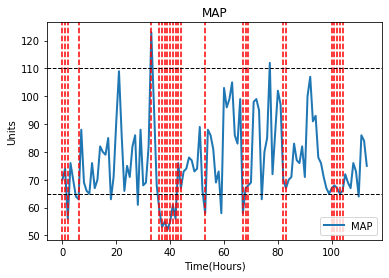

NameError: name 'resp_predict' is not defined

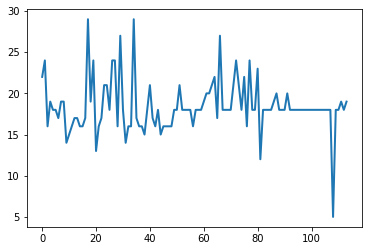

In [142]:
print_results(df_test)

In [529]:
df_test[['TIMESERIES','CHARTTIME']].iloc[118:140]
# df_test[['TIMESERIES','CHARTTIME']]

,TIMESERIES,CHARTTIME


In [474]:
icu_classify_df[icu_classify_df['SUBJECT_ID'].isin(test_list)]

,SUBJECT_ID,ICUSTAY_ID,CHARTTIME,heart rate,spo2,arterial bp mean,respiratory rate,arterial bp [diastolic],arterial bp [systolic],TARGET_hr,TARGET_spo2,TARGET_map,TARGET_resp,TIME
127,124,255660.0,2160-07-09 19:00:00,54.0,100.0,86.0,13.0,55.0,154.0,0,0,1,0,2160-07-09 20:00:00
128,124,255660.0,2160-07-09 20:00:00,60.0,100.0,118.0,13.0,95.0,179.0,0,0,1,0,2160-07-09 21:00:00
129,124,255660.0,2160-07-09 21:00:00,65.0,98.0,64.0,14.0,36.0,135.0,0,0,0,0,2160-07-09 22:00:00
130,124,255660.0,2160-07-09 22:00:00,69.0,98.0,96.0,17.0,60.0,174.0,0,0,0,0,2160-07-09 23:00:00
131,124,255660.0,2160-07-10 00:00:00,73.0,98.0,72.0,17.0,48.0,137.0,0,0,0,0,2160-07-10 01:00:00
132,124,255660.0,2160-07-10 01:00:00,72.0,98.0,69.0,17.0,46.0,127.0,0,0,0,0,2160-07-10 02:00:00
133,124,255660.0,2160-07-10 02:00:00,73.0,98.0,68.0,16.0,45.0,123.0,0,0,0,0,2160-07-10 03:00:00
134,124,255660.0,2160-07-10 03:00:00,73.0,98.0,78.0,13.0,49.0,139.0,0,0,0,0,2160-07-10 04:00:00
135,124,255660.0,2160-07-10 04:00:00,84.0,99.0,89.0,19.0,54.0,156.0,0,0,0,0,2160-07-10 05:00:00
136,124,255660.0,2160-07-10 05:00:00,75.0,97.0,82.0,15.0,49.0,145.0,0,0,0,0,2160-07-10 06:00:00
